# Figure 3: iModulon Examples

## Setup

In [11]:
from os import path
import seaborn as sns
import matplotlib.pyplot as plt

from pymodulon.io import load_json_model
from pymodulon.plotting import *

### Set plotting style

In [12]:
sns.set_style('ticks')
plt.style.use('custom.mplstyle')

### Load data

In [13]:
figure_dir = '../../reports/figures/modulome/Fig4'
data_dir = path.join('../..','data','processed', 'modulome')

In [14]:
data_file = path.join(data_dir,'salb.json.gz')
ica_data = load_json_model(data_file)

# BGCs table

Make a table to summarize the BGC related iModulons

In [42]:
gene_info = pd.read_csv('../../data/processed/modulome/merged_gene_info.csv', index_col=0)

#Get a list of imodulon names with function 'Secondary Metabolism'
iModulons = ica_data.imodulon_table[ica_data.imodulon_table['function'] == 'Secondary Metabolism'].index

# Initialize an empty DataFrame with the desired columns
df = pd.DataFrame(columns=['iModulon', 'BGC', 'Total Genes', 'iModulon Coverage'])

# Iterate over all BGCs
for bgc in gene_info['BGC_region'].unique():
    if bgc != 'None':
        # Get the subset of gene_info for the current BGC
        df_bgc_subset = gene_info[gene_info['BGC_region'] == bgc]
        
        # Calculate the total number of genes in the BGC
        total_genes = df_bgc_subset.shape[0]
        
        # Iterate over each iModulon
        for imodulon in iModulons:
            # Calculate the number of genes in the intersection of the BGC and the current iModulon
            intersection_genes = df_bgc_subset[df_bgc_subset['Imodulon'].apply(lambda x: imodulon in str(x).split(', '))].shape[0]
            
            # Calculate the coverage
            coverage = (intersection_genes / total_genes)*100 if total_genes > 0 else 0

            # specify two decimal places
            coverage = round(coverage, 2)
            
            # Append the information to the DataFrame only if intersection_genes > 0
            if intersection_genes > 0:
                df = df.append({'iModulon': imodulon, 'BGC': bgc, 'Total Genes': total_genes, 'iModulon Coverage': coverage}, ignore_index=True)

# Sort the dataframe by iModulon name and then by BGC
df = df.sort_values(by=['iModulon', 'BGC'])

#df.to_csv('../../../../Desktop/preprint_figs/panel3/bgc_coverage.csv')
df.to_clipboard()

In [40]:
# Transpose ica_data.A to make the iModulons the columns and the samples the index
ica_data_A_transposed = ica_data.A.transpose()

# Initialize an empty DataFrame to store the top samples for each iModulon
top_samples_df = pd.DataFrame()

# Iterate over the iModulons in df
for imodulon in df['iModulon'].unique():
    # Get the activities for the current iModulon from ica_data_A_transposed
    imodulon_activities = ica_data_A_transposed[imodulon]
    
    # Get the top 10 samples with the highest absolute activity
    top_samples = imodulon_activities.nlargest(10)
    
    # Convert the Series to a DataFrame and add a column for the iModulon name
    top_samples = top_samples.to_frame(name='Activity').reset_index().rename(columns={'index': 'Sample'})
    top_samples['iModulon'] = imodulon
    
    # Append the top samples for the current iModulon to the overall DataFrame
    top_samples_df = top_samples_df.append(top_samples, ignore_index=True)

# Sort the DataFrame by iModulon name and then by activity
top_samples_df = top_samples_df.sort_values(by=['iModulon', 'Activity'], ascending=[True, False])

# Get the projects for each sample from ica_data.sample_table
top_samples_df['Project'] = top_samples_df['Sample'].apply(lambda x: ica_data.sample_table.loc[x, 'project'])

top_samples_df.to_clipboard()

# surugamide gene weights

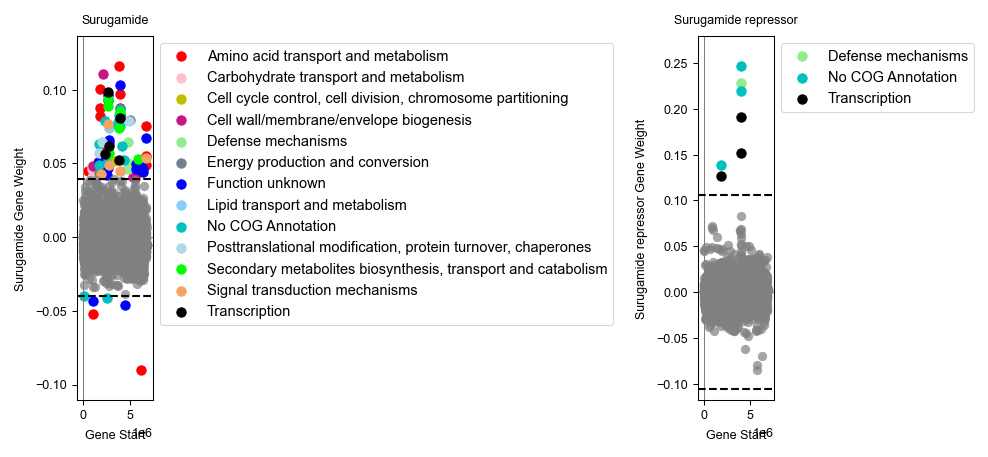

In [9]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['Surugamide','Surugamide repressor']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the gene weights
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_gene_weights(ica_data, imodulons[i], show_labels=False, label_font_kwargs={'fontsize':6}, ax=ax, legend=True, scatter_kwargs={'s': 20})
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig(path.join(figure_dir,'legend.svg'), dpi=300)
plt.show()

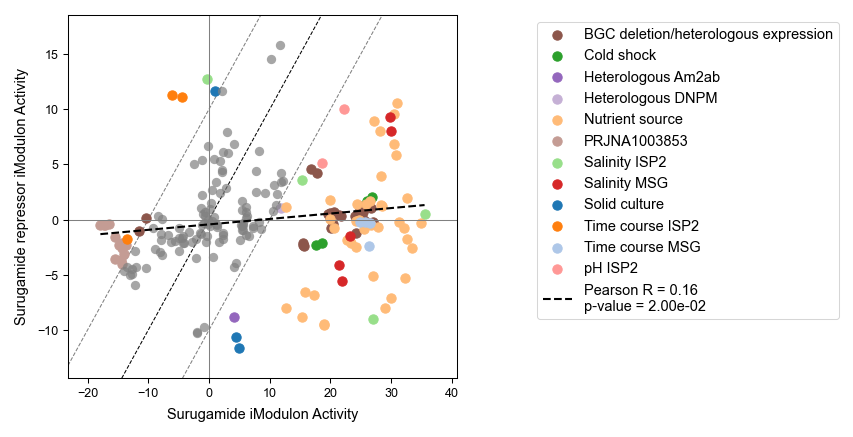

In [33]:
# Convert the page size from mm to inches
width = 85 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

fig,ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

# Generate 16 colors from the 'tab20' colormap
colors = plt.cm.tab20(range(16))

compare_activities(ica_data,'Surugamide','Surugamide repressor',
                   ax=ax,
                   line45=True,
                   fit_line=True,
                   line45_margin=10,
                   groups=groups,
                   colors = colors,
                   scatter_kwargs={'s': 20}) # Increase dot size

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
#ax.set_xlabel('Surugamide repressor', fontsize=6)
#ax.set_ylabel('Surugamide', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

#plt.savefig(path.join(figure_dir,'surugamide_phase.svg'))

In [43]:
print(len(groups.keys()))

218


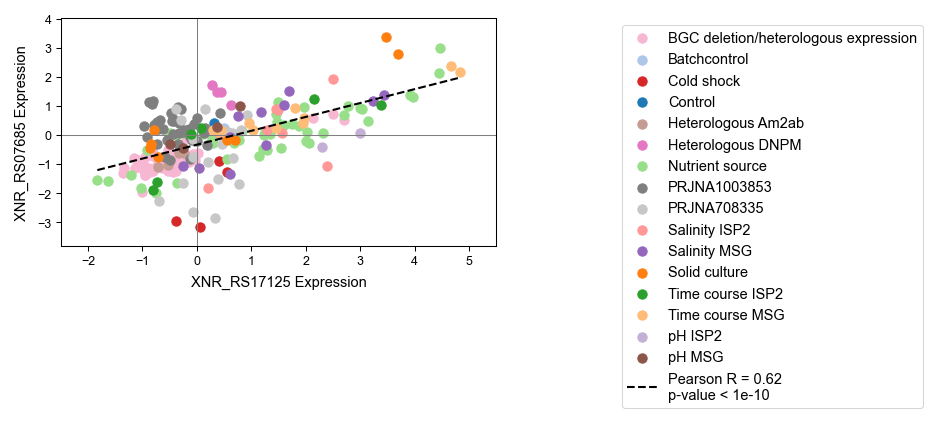

In [15]:
# Convert the page size from mm to inches
width = 95 / 25.4  # ~6.69 inches
height = 50 / 25.4  # ~3.94 inches

fig,ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

# Generate 16 colors from the 'tab20' colormap
colors = plt.cm.tab20(range(16))

# Pass the axes object to compare_expression
compare_expression(ica_data,'XNR_RS17125', 'XNR_RS07685', ax=ax, colors=colors, groups=groups,
                   scatter_kwargs={'s': 20})

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
#ax.set_xlabel('Surugamide repressor', fontsize=6)
#ax.set_ylabel('Surugamide', fontsize=6)

# Move the legend to the top right outside the plot
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))

#plt.savefig(path.join(figure_dir,'surugamide_TFs_expr_correlation.svg'))       

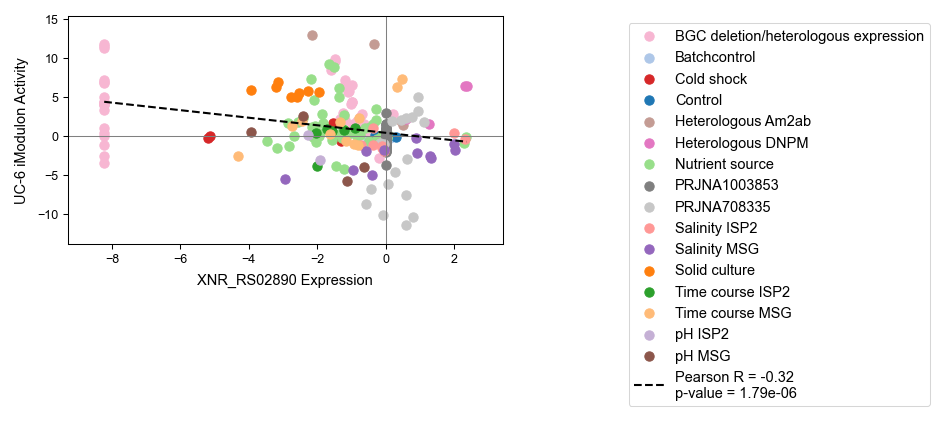

In [8]:
# Convert the page size from mm to inches
width = 95 / 25.4  # ~6.69 inches
height = 50 / 25.4  # ~3.94 inches

fig,ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

# Generate 16 colors from the 'tab20' colormap
colors = plt.cm.tab20(range(16))

# Pass the axes object to compare_expression
compare_imodulon_gene(ica_data,'UC-6', 'XNR_RS02890', ax=ax, colors=colors, groups=groups,
                   scatter_kwargs={'s': 20})

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
#ax.set_xlabel('Surugamide repressor', fontsize=6)
#ax.set_ylabel('Surugamide', fontsize=6)

# Move the legend to the top right outside the plot
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))

#plt.savefig(path.join(figure_dir,'surugamide_TFs_expr_correlation.svg'))       

# TF correlation
My thinking is that if a TF is correlated with other genes, then it might be a regulator of those genes. Some may have been missed in the imodulon classification.

In [161]:
gene_info = pd.read_csv('../../data/processed/modulome/merged_gene_info.csv')

tf_info = pd.read_csv('../../data/interim/modulome/tf_info.csv')

# Get the list of transcription factor names
tf_list = tf_info['locus_tag'].tolist()

# Assuming ica_data.X is your DataFrame and tf_list is your list of transcription factors
df = ica_data.X

# Remove genes with Nan values
df = df.dropna()

# Transpose the DataFrame so that the genes are the rows
df = df.T

# Initialize a list to store the correlation data
correlation_data = []

# Loop over the transcription factors
for tf in tf_list:
    # Get the expression data for the current transcription factor
    tf_expression = df[tf]

    # Calculate the correlation of the current transcription factor with all other genes
    correlation = df.corrwith(tf_expression)

    # Add the correlation data to the list
    correlation_data.append(correlation)

# Concatenate all the correlation data into a DataFrame
correlation_df = pd.concat(correlation_data, axis=1, keys=tf_list)


correlation_df

XNR_RS00130  XNR_RS07815  XNR_RS20690  XNR_RS06235  XNR_RS05005  \
XNR_RS30570     0.114089     0.046123    -0.039838    -0.017054     0.022997   
XNR_RS00005    -0.029800     0.162308    -0.406408    -0.288519     0.156508   
XNR_RS00010     0.067208     0.414899    -0.017474    -0.038201    -0.069736   
XNR_RS00015    -0.354170     0.722513    -0.327532    -0.194250     0.213970   
XNR_RS00020    -0.443139     0.718296    -0.417258    -0.386164     0.076844   
...                  ...          ...          ...          ...          ...   
XNR_RS29420          NaN          NaN          NaN          NaN          NaN   
XNR_RS29425          NaN          NaN          NaN          NaN          NaN   
XNR_RS29430          NaN          NaN          NaN          NaN          NaN   
XNR_RS30650          NaN          NaN          NaN          NaN          NaN   
XNR_RS30655          NaN          NaN          NaN          NaN          NaN   

             XNR_RS29085  XNR_RS01290  XNR_RS07900  XNR_RS15695  XNR_RS04795  \
XNR_RS30570     0.422931     0.036287     0.262845     0.148025     0.016955   
XNR_RS00005     0.497489     0.039984     0.479951     0.180948    -0.215019   
XNR_RS00010     0.211538     0.213880     0.285344     0.125565     0.047248   
XNR_RS00015    -0.039473    -0.017335     0.380962     0.268034    -0.444995   
XNR_RS00020    -0.098676    -0.132644     0.302222     0.132725    -0.494089   
...                  ...          ...          ...          ...          ...   
XNR_RS29420          NaN          NaN          NaN          NaN          NaN   
XNR_RS29425          NaN          NaN          NaN          NaN          NaN   
XNR_RS29430          NaN          NaN          NaN          NaN          NaN   
XNR_RS30650          NaN          NaN          NaN          NaN          NaN   
XNR_RS30655          NaN          NaN          NaN          NaN          NaN   

             ...  XNR_RS16640  XNR_RS11710  XNR_RS13210  XNR_RS07675  \
XNR_RS30570  ...     0.132533     0.182778     0.009968     0.330156   
XNR_RS00005  ...     0.067562    -0.016369    -0.230421     0.265167   
XNR_RS00010  ...     0.617324     0.392507     0.212119     0.023963   
XNR_RS00015  ...     0.567977     0.153922     0.388170    -0.128518   
XNR_RS00020  ...     0.414125     0.003076     0.231948    -0.255479   
...          ...          ...          ...          ...          ...   
XNR_RS29420  ...          NaN          NaN          NaN          NaN   
XNR_RS29425  ...          NaN          NaN          NaN          NaN   
XNR_RS29430  ...          NaN          NaN          NaN          NaN   
XNR_RS30650  ...          NaN          NaN          NaN          NaN   
XNR_RS30655  ...          NaN          NaN          NaN          NaN   

             XNR_RS00635  XNR_RS27455  XNR_RS13190  XNR_RS17385  XNR_RS14185  \
XNR_RS30570     0.187364    -0.094989    -0.049689     0.031377    -0.128785   
XNR_RS00005     0.207505     0.116540    -0.331002    -0.074913    -0.254267   
XNR_RS00010     0.386951     0.031023     0.331428     0.410535     0.248032   
XNR_RS00015     0.186141     0.452083     0.228125     0.333899     0.330862   
XNR_RS00020     0.202608     0.565991     0.253628     0.173053     0.338265   
...                  ...          ...          ...          ...          ...   
XNR_RS29420          NaN          NaN          NaN          NaN          NaN   
XNR_RS29425          NaN          NaN          NaN          NaN          NaN   
XNR_RS29430          NaN          NaN          NaN          NaN          NaN   
XNR_RS30650          NaN          NaN          NaN          NaN          NaN   
XNR_RS30655          NaN          NaN          NaN          NaN          NaN   

             XNR_RS15430  
XNR_RS30570    -0.105197  
XNR_RS00005    -0.155883  
XNR_RS00010     0.397021  
XNR_RS00015     0.362479  
XNR_RS00020     0.134166  
...                  ...  
XNR_RS29420          NaN  
XNR_RS29425          NaN  
XNR_RS29430          N

## Using spearmanr to check for non-linear relationships as well, and calculate p-values

In [43]:
from scipy.stats import spearmanr

gene_info = pd.read_csv('../../data/processed/modulome/merged_gene_info.csv')

tf_info = pd.read_csv('../../data/interim/modulome/tf_info.csv')

# Get the list of transcription factor names
tf_list = tf_info['locus_tag'].tolist()

# Assuming ica_data.X is your DataFrame and tf_list is your list of transcription factors
df = ica_data.X

# Remove genes with Nan values
df = df.dropna()

# Transpose the DataFrame so that the genes are the rows
df = df.T

# Initialize a list to store the correlation data
correlation_data = []
p_value_data = []

# Define chunk size
chunk_size = 100

# Loop over the transcription factors in chunks
for i in range(0, len(tf_list), chunk_size):
    chunk_tf_list = tf_list[i:i+chunk_size]
    for tf in chunk_tf_list:
        # Get the expression data for the current transcription factor
        tf_expression = df[tf]

        # Calculate the Spearman correlation of the current transcription factor with all other genes
        correlation, p_value = spearmanr(df, tf_expression)

        # Add the correlation data and p-values to the lists
        correlation_data.append(correlation)
        p_value_data.append(p_value)

# Concatenate all the correlation data and p-values into DataFrames
correlation_df = pd.concat(correlation_data, axis=1, keys=tf_list)
p_value_df = pd.concat(p_value_data, axis=1, keys=tf_list)

correlation_df, p_value_df

/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


: 

In [204]:
# change the name of th4e first column to 'locus_tag'
correlation_df2 = correlation_df.rename_axis('locus_tag')

correlation_df2 = correlation_df2.reset_index()

# Merge the correlation data with the gene information
merged = pd.merge(correlation_df2, gene_info, on='locus_tag')

# Filter to only include genes in a BGC
bgc_correlation = merged[merged['BGC_region'].notnull()]

# Remove columns that are not needed
bgc_correlation = bgc_correlation.drop(columns=['start', 'end', 'strand', 'PFAMs', 'accession', 'old_locus_tag', 'operon', 'KEGG_Module', 'KEGG_Reaction',
                                                'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'eggNOG_OGs', 'Description', 'GOs',
                                                'EC', 'KEGG_ko', 'KEGG_Pathway'])

bgc_correlation = bgc_correlation.set_index('locus_tag')

XNR_RS00130  XNR_RS07815  XNR_RS20690  XNR_RS06235  XNR_RS05005  \
locus_tag                                                                      
XNR_RS00010     0.067208     0.414899    -0.017474    -0.038201    -0.069736   
XNR_RS00015    -0.354170     0.722513    -0.327532    -0.194250     0.213970   
XNR_RS00020    -0.443139     0.718296    -0.417258    -0.386164     0.076844   
XNR_RS00025    -0.480704     0.691834    -0.422491    -0.341054     0.163356   
XNR_RS00030     0.018229     0.263491     0.117223     0.113183    -0.032727   

             XNR_RS29085  XNR_RS01290  XNR_RS07900  XNR_RS15695  XNR_RS04795  \
locus_tag                                                                      
XNR_RS00010     0.211538     0.213880     0.285344     0.125565     0.047248   
XNR_RS00015    -0.039473    -0.017335     0.380962     0.268034    -0.444995   
XNR_RS00020    -0.098676    -0.132644     0.302222     0.132725    -0.494089   
XNR_RS00025    -0.154423    -0.159066     0.264903     0.160107    -0.560995   
XNR_RS00030    -0.074352     0.077624     0.125194     0.108154     0.048150   

             ...  XNR_RS27455  XNR_RS13190  XNR_RS17385  XNR_RS14185  \
locus_tag    ...                                                       
XNR_RS00010  ...     0.031023     0.331428     0.410535     0.248032   
XNR_RS00015  ...     0.452083     0.228125     0.333899     0.330862   
XNR_RS00020  ...     0.565991     0.253628     0.173053     0.338265   
XNR_RS00025  ...     0.557550     0.264310     0.165907     0.351184   
XNR_RS00030  ...     0.079984     0.407689     0.333884     0.281272   

             XNR_RS15430  BGC_region    gene_name  \
locus_tag                                           
XNR_RS00010     0.397021         1.0  XNR_RS00010   
XNR_RS00015     0.362479         1.0  XNR_RS00015   
XNR_RS00020     0.134166         1.0  XNR_RS00020   
XNR_RS00025     0.118996         1.0  XNR_RS00025   
XNR_RS00030     0.266380         1.0  XNR_RS00030   

                                          gene_product  \
locus_tag                                                
XNR_RS00010                       hypothetical protein   
XNR_RS00015  IS5-like element IS112 family transposase   
XNR_RS00020                       hypothetical protein   
XNR_RS00025     dihydrolipoamide S-succinyltransferase   
XNR_RS00030              vWA domain-containing protein   

                                               COG    Imodulon  
locus_tag                                                       
XNR_RS00010  Replication, recombination and repair         NaN  
XNR_RS00015                       Function unknown         NaN  
XNR_RS00020                      No COG Annotation         NaN  
XNR_RS00025                          Transcription         NaN  
XNR_RS00030    Amino acid transport and metabolism  DNA damage  

[5 rows x 424 columns]

In [235]:
merged = merged.set_index('locus_tag')
merged.to_csv('../../data/processed/modulome/tf_correlation.csv')

In [206]:
correlation_df2 = correlation_df2.set_index('locus_tag')
correlation_df2

XNR_RS00130  XNR_RS07815  XNR_RS20690  XNR_RS06235  XNR_RS05005  \
locus_tag                                                                      
XNR_RS30570     0.114089     0.046123    -0.039838    -0.017054     0.022997   
XNR_RS00005    -0.029800     0.162308    -0.406408    -0.288519     0.156508   
XNR_RS00010     0.067208     0.414899    -0.017474    -0.038201    -0.069736   
XNR_RS00015    -0.354170     0.722513    -0.327532    -0.194250     0.213970   
XNR_RS00020    -0.443139     0.718296    -0.417258    -0.386164     0.076844   
...                  ...          ...          ...          ...          ...   
XNR_RS29420          NaN          NaN          NaN          NaN          NaN   
XNR_RS29425          NaN          NaN          NaN          NaN          NaN   
XNR_RS29430          NaN          NaN          NaN          NaN          NaN   
XNR_RS30650          NaN          NaN          NaN          NaN          NaN   
XNR_RS30655          NaN          NaN          NaN          NaN          NaN   

             XNR_RS29085  XNR_RS01290  XNR_RS07900  XNR_RS15695  XNR_RS04795  \
locus_tag                                                                      
XNR_RS30570     0.422931     0.036287     0.262845     0.148025     0.016955   
XNR_RS00005     0.497489     0.039984     0.479951     0.180948    -0.215019   
XNR_RS00010     0.211538     0.213880     0.285344     0.125565     0.047248   
XNR_RS00015    -0.039473    -0.017335     0.380962     0.268034    -0.444995   
XNR_RS00020    -0.098676    -0.132644     0.302222     0.132725    -0.494089   
...                  ...          ...          ...          ...          ...   
XNR_RS29420          NaN          NaN          NaN          NaN          NaN   
XNR_RS29425          NaN          NaN          NaN          NaN          NaN   
XNR_RS29430          NaN          NaN          NaN          NaN          NaN   
XNR_RS30650          NaN          NaN          NaN          NaN          NaN   
XNR_RS30655          NaN          NaN          NaN          NaN          NaN   

             ...  XNR_RS16640  XNR_RS11710  XNR_RS13210  XNR_RS07675  \
locus_tag    ...                                                       
XNR_RS30570  ...     0.132533     0.182778     0.009968     0.330156   
XNR_RS00005  ...     0.067562    -0.016369    -0.230421     0.265167   
XNR_RS00010  ...     0.617324     0.392507     0.212119     0.023963   
XNR_RS00015  ...     0.567977     0.153922     0.388170    -0.128518   
XNR_RS00020  ...     0.414125     0.003076     0.231948    -0.255479   
...          ...          ...          ...          ...          ...   
XNR_RS29420  ...          NaN          NaN          NaN          NaN   
XNR_RS29425  ...          NaN          NaN          NaN          NaN   
XNR_RS29430  ...          NaN          NaN          NaN          NaN   
XNR_RS30650  ...          NaN          NaN          NaN          NaN   
XNR_RS30655  ...          NaN          NaN          NaN          NaN   

             XNR_RS00635  XNR_RS27455  XNR_RS13190  XNR_RS17385  XNR_RS14185  \
locus_tag                                                                      
XNR_RS30570     0.187364    -0.094989    -0.049689     0.031377    -0.128785   
XNR_RS00005     0.207505     0.116540    -0.331002    -0.074913    -0.254267   
XNR_RS00010     0.386951     0.031023     0.331428     0.410535     0.248032   
XNR_RS00015     0.186141     0.452083     0.228125     0.333899     0.330862   
XNR_RS00020     0.202608     0.565991     0.253628     0.173053     0.338265   
...                  ...          ...          ...          ...          ...   
XNR_RS29420          NaN          NaN          NaN          NaN          NaN   
XNR_RS29425          NaN          NaN          NaN          NaN          NaN   
XNR_RS29430          NaN          NaN          NaN          NaN          NaN   
XNR_RS30650          NaN          NaN          NaN          NaN          NaN   
XNR_RS30655          NaN          

In [207]:
correlation_df2.to_csv('../../data/processed/modulome/tf_correlation.csv')

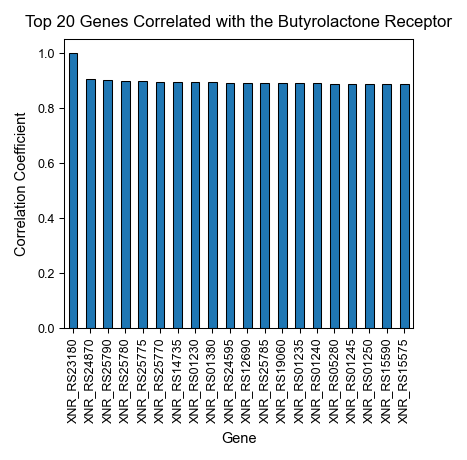

In [240]:
butyrolactone_receptor = 'XNR_RS23180'

# Get the correlation data for the butyrolactone receptor gene
butyrolactone_correlation = correlation_df2[butyrolactone_receptor]

# convert to absolute values
butyrolactone_correlation = butyrolactone_correlation.abs()

# Sort the correlation data
sorted_correlation = butyrolactone_correlation.sort_values(ascending=False)

# Bar grapgh of the top 20 genes correlated with the butyrolactone receptor
sorted_correlation.head(20).plot(kind='bar')
plt.title('Top 20 Genes Correlated with the Butyrolactone Receptor')
plt.xlabel('Gene')
plt.ylabel('Correlation Coefficient')
plt.show()

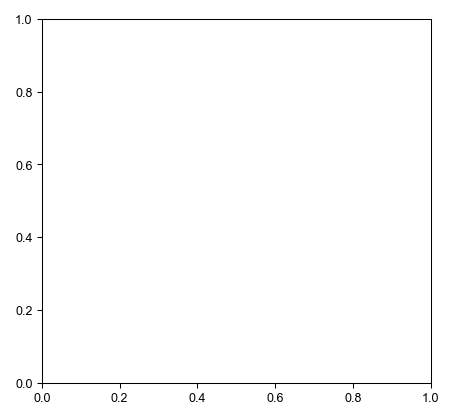

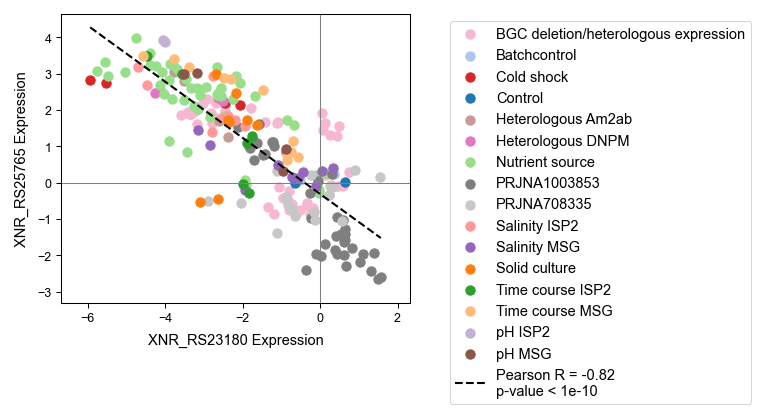

In [236]:
# Convert the page size from mm to inches
width = 85 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

fig,ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

# Generate 16 colors from the 'tab20' colormap
colors = plt.cm.tab20(range(16))

compare_expression(ica_data,'XNR_RS23180', 'XNR_RS25765', colors=colors, groups=groups,
                   scatter_kwargs={'s': 20})

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
#ax.set_xlabel('Surugamide repressor', fontsize=6)
#ax.set_ylabel('Surugamide', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

#plt.savefig(path.join(figure_dir,'surugamide_TFs_expr_correlation.svg'))    

/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


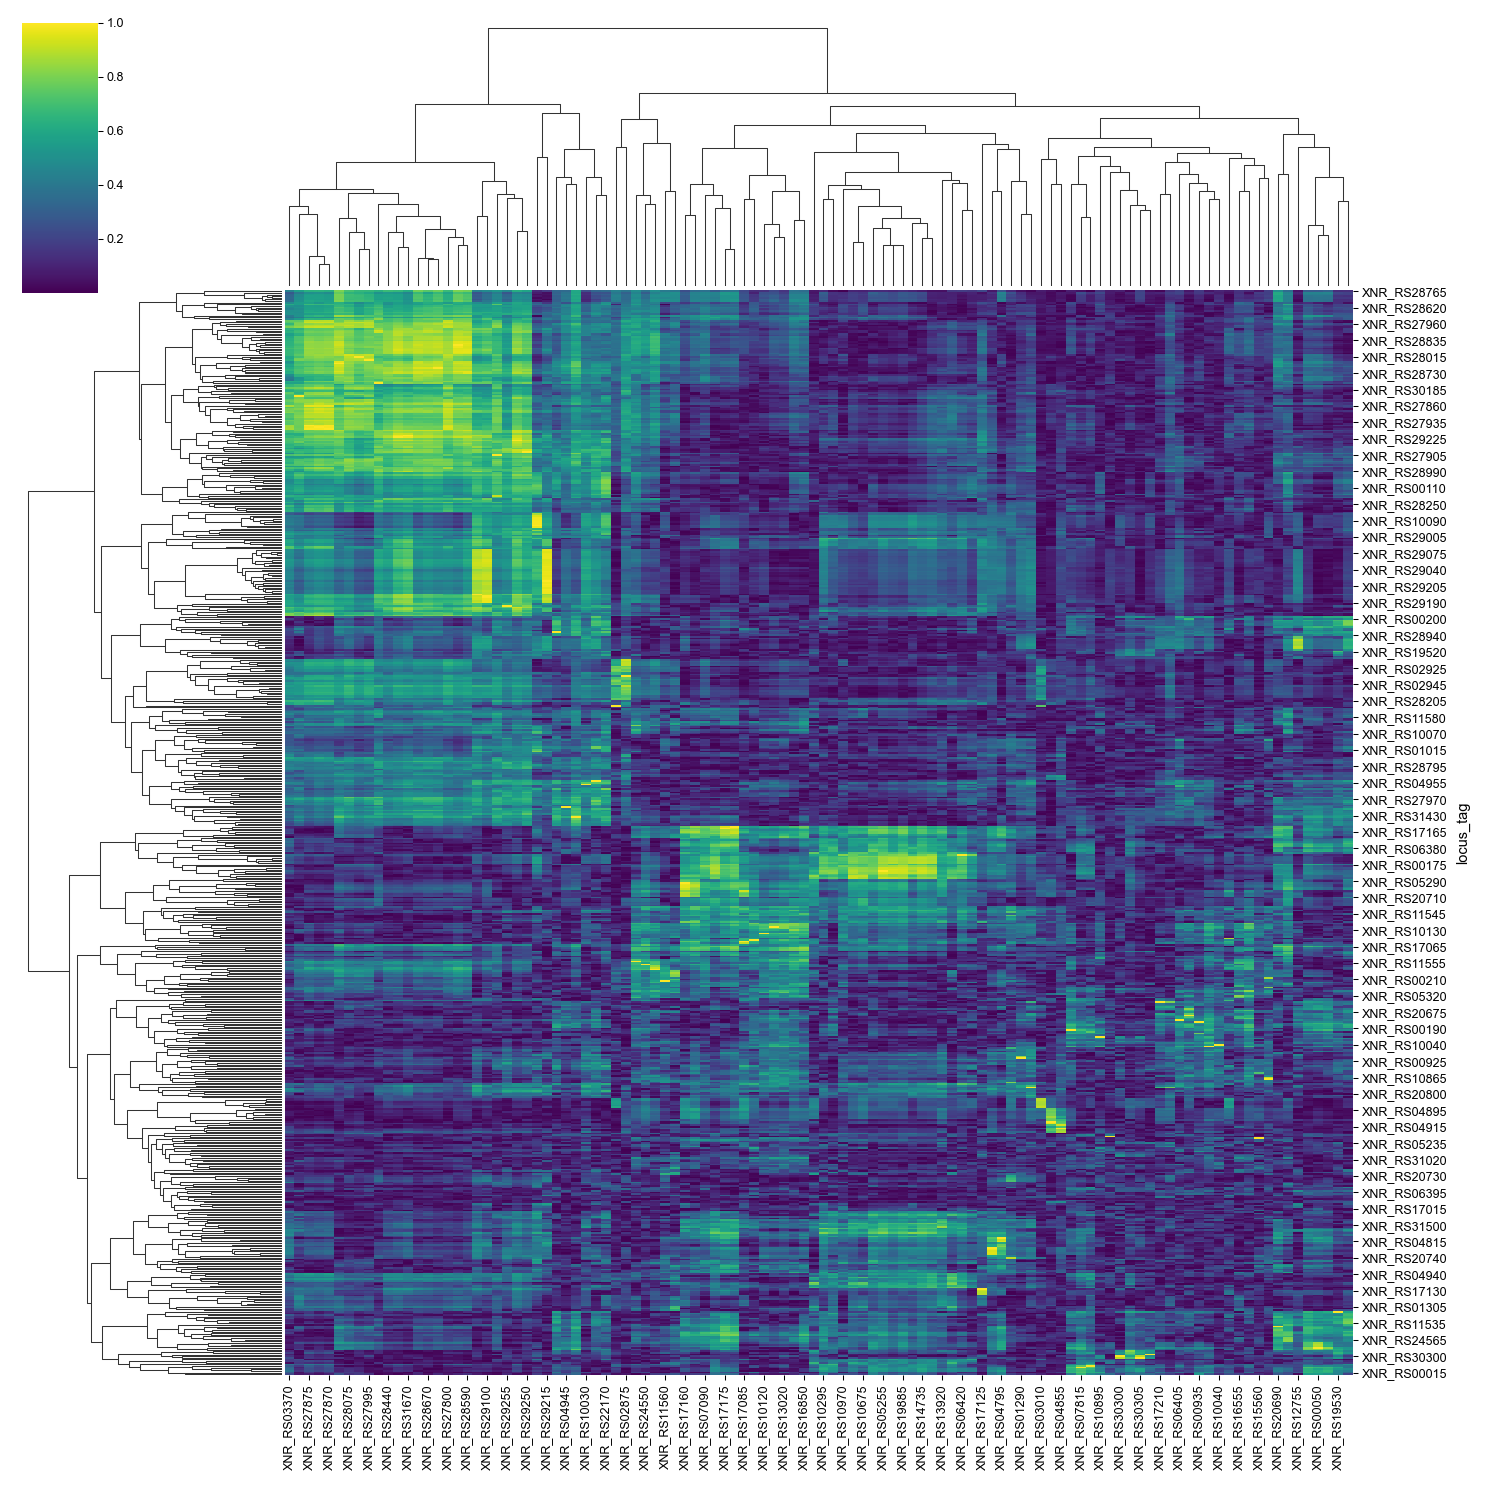

In [228]:
# Isolate the correlation scores
correlation_scores = bgc_correlation.drop(columns=['BGC_region', 'gene_name', 'gene_product', 'COG', 'Imodulon'])

# drop nan values
correlation_scores = correlation_scores.dropna(axis=1, how='all')
correlation_scores = correlation_scores.dropna(axis=0, how='any')

# Take the absolute value of the correlation scores
absolute_correlation_scores = correlation_scores.abs()

absolute_correlation_scores = absolute_correlation_scores.loc[:, (absolute_correlation_scores > 0.8).any()]

# Create a clustermap of the absolute correlation scores
sns.clustermap(absolute_correlation_scores, cmap='viridis')

# Show the plot
plt.show()

In [195]:
# Filter to only include genes in BGC_region 1.0
bgc1_correlation = bgc_correlation[bgc_correlation['BGC_region'] == 1.0]

# Drop non-TF columns
tf_columns = set(bgc1_correlation.columns) - set(['BGC_region', 'gene_name', 'gene_product', 'COG', 'Imodulon'])
bgc1_correlation = bgc1_correlation[tf_columns]

# Calculate the maximum absolute correlation for each TF
max_correlations = bgc1_correlation.abs().max()

# Sort the TFs by their maximum absolute correlation
sorted_tfs = max_correlations.sort_values(ascending=False)

sorted_tfs

XNR_RS00050    1.000000
XNR_RS00130    1.000000
XNR_RS14575    0.846204
XNR_RS19030    0.834469
XNR_RS25330    0.821369
                 ...   
XNR_RS07220    0.242010
XNR_RS25245    0.215887
XNR_RS03010    0.207535
XNR_RS05170    0.206667
XNR_RS29390         NaN
Length: 419, dtype: float64

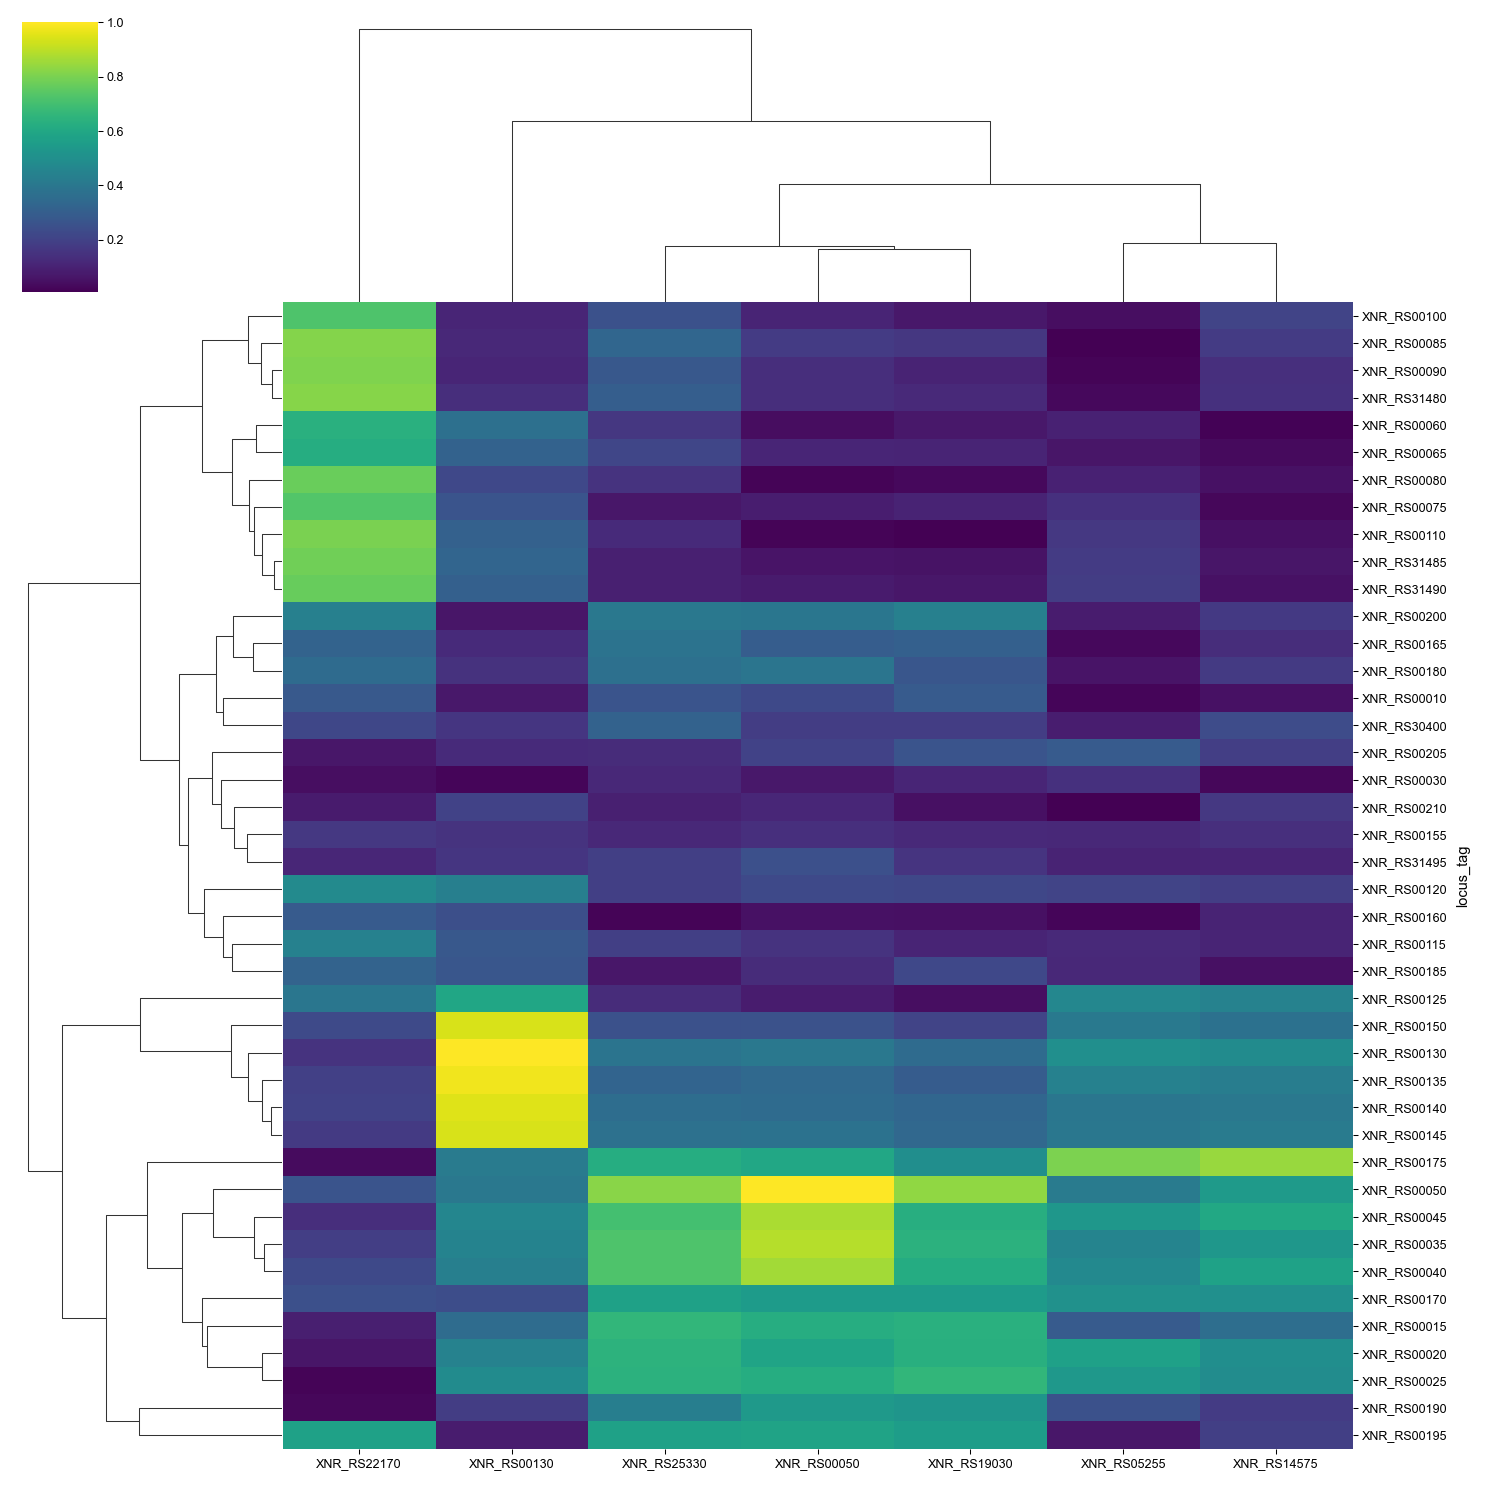

In [200]:
# Take the absolute value of the correlation scores
absolute_correlation_scores = bgc1_correlation.abs()

# drop nan values
absolute_correlation_scores = absolute_correlation_scores.dropna(axis=1, how='all')
absolute_correlation_scores = absolute_correlation_scores.dropna(axis=0, how='any')

# Remove columns where there is no score > 0.5
absolute_correlation_scores = absolute_correlation_scores.loc[:, (absolute_correlation_scores > 0.8).any()]

# Create a clustermap of the absolute correlation scores
sns.clustermap(absolute_correlation_scores, cmap='viridis')

# Show the plot
plt.show()

Check if any of the BGC core biosynthetiic genes are significantly correlated with a TF

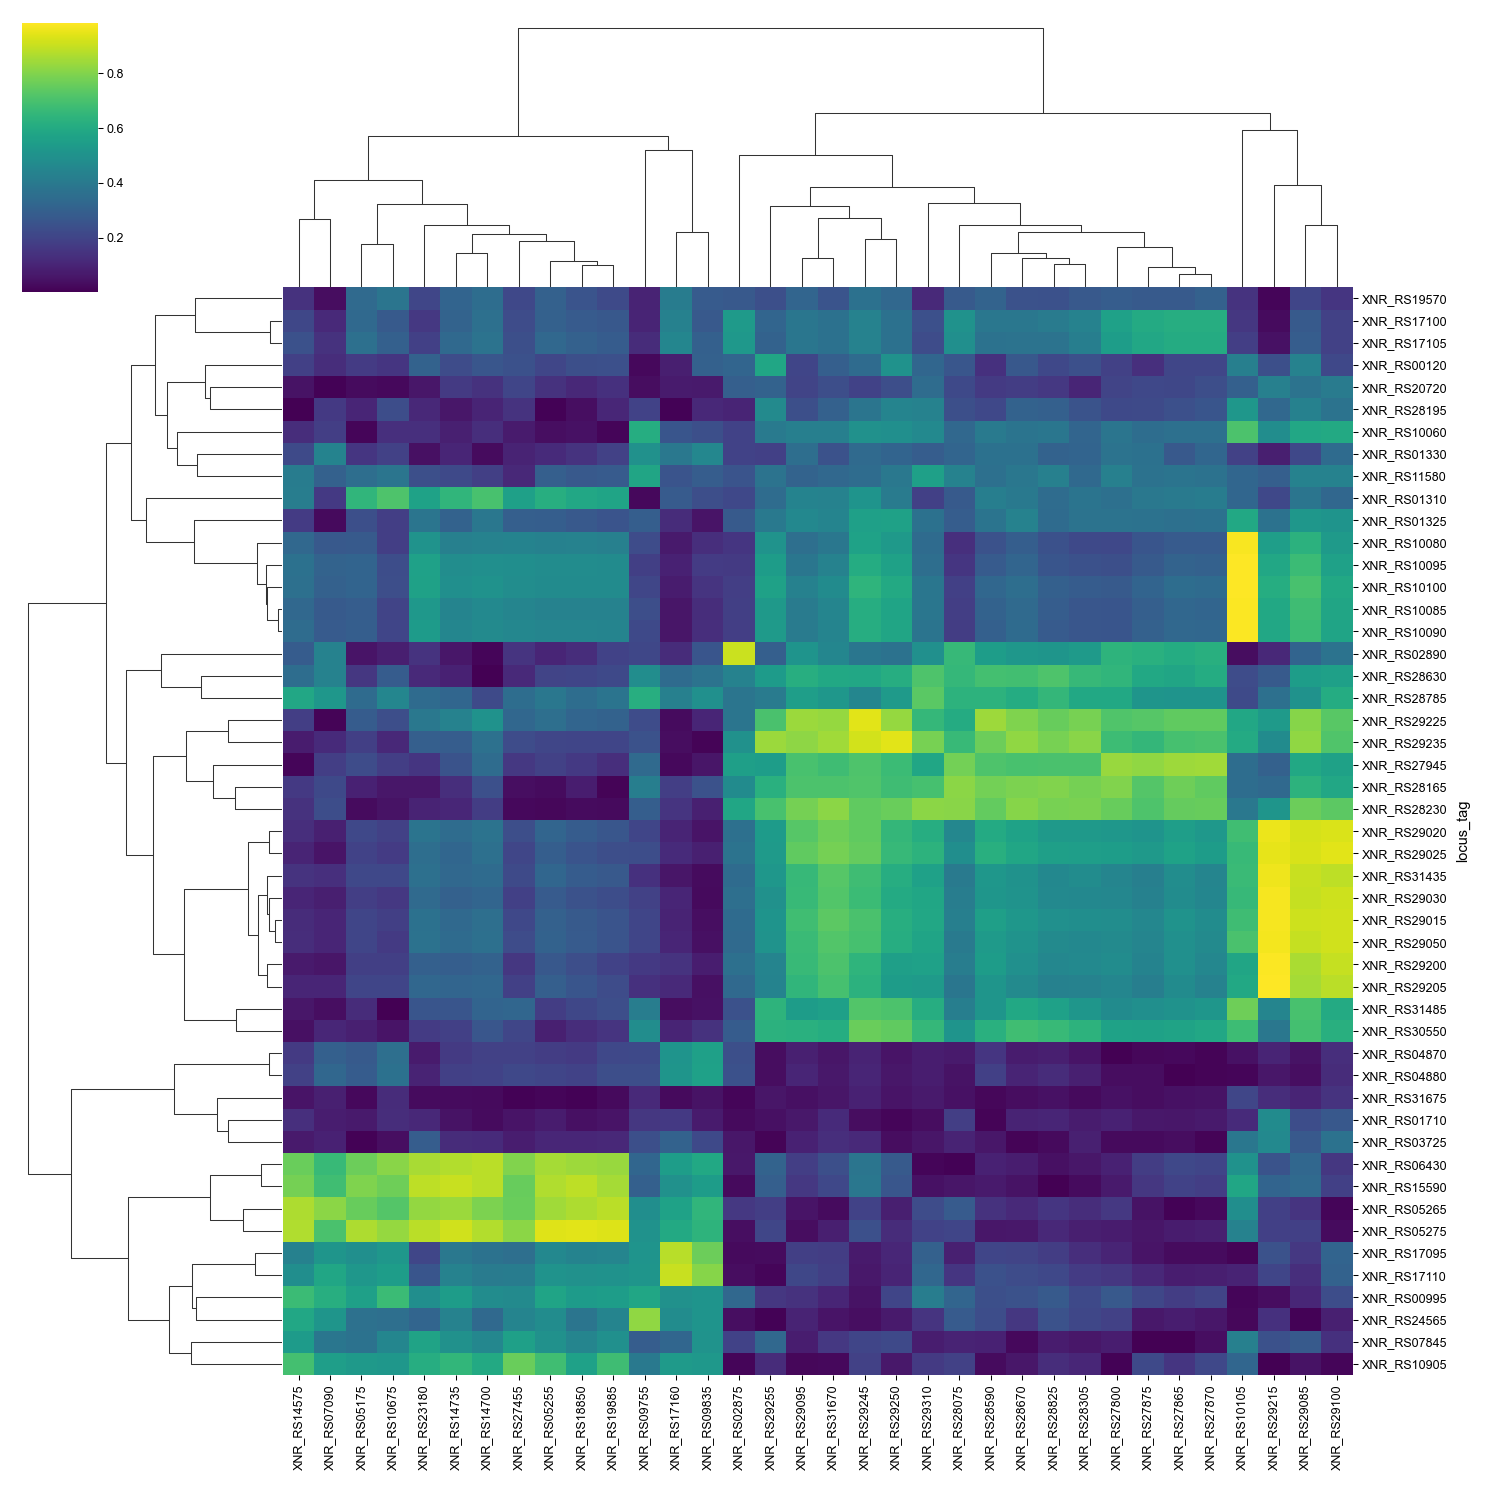

In [203]:
# Define list of core biosynthetic genes
from distutils import core


core_biosynthetic_genes = ['XNR_RS31485', 'XNR_RS00120', 'XNR_RS00995', 'XNR_RS01310', 'XNR_RS01325', 'XNR_RS01330', 'XNR_RS01710', 'XNR_RS02890', 'XNR_RS03725',
                           'XNR_RS04870', 'XNR_RS04880', 'XNR_RS05265', 'XNR_RS05275', 'XNR_RS06430', 'XNR_RS07845', 'XNR_RS10060', 'XNR_RS10080', 'XNR_RS10085',
                           'XNR_RS10090', 'XNR_RS10095', 'XNR_RS10100', 'XNR_RS10905', 'XNR_RS11580', 'XNR_RS15590', 'XNR_RS17095', 'XNR_RS17100', 'XNR_RS17105',
                           'XNR_RS17110', 'XNR_RS19570', 'XNR_RS20720', 'XNR_RS24565', 'XNR_RS27945', 'XNR_RS28165', 'XNR_RS28195', 'XNR_RS28230', 'XNR_RS28630',
                           'XNR_RS28785', 'XNR_RS29015', 'XNR_RS29020', 'XNR_RS29025', 'XNR_RS29030', 'XNR_RS31435', 'XNR_RS29050', 'XNR_RS29200', 'XNR_RS29205',
                           'XNR_RS29225', 'XNR_RS29235', 'XNR_RS30550', 'XNR_RS31675']

# Filter core_biosynthetic_genes to only include genes that are in the index of filtered_df
core_biosynthetic_genes = [gene for gene in core_biosynthetic_genes if gene in absolute_correlation_scores.index]

# Filter filtered df to only contain core biosynthetic genes rows
core_biosynthetic_df = absolute_correlation_scores.loc[core_biosynthetic_genes]

# drop colomns with just NaN values
core_biosynthetic_df = core_biosynthetic_df.dropna(axis=1, how='all')
core_biosynthetic_df = core_biosynthetic_df.dropna(axis=0, how='any')

# Remove columns where there is no score > 0.5
core_biosynthetic_df = core_biosynthetic_df.loc[:, (core_biosynthetic_df > 0.8).any()]

# Create a clustermap of the absolute correlation scores
sns.clustermap(core_biosynthetic_df, cmap='viridis')

# Show the plot
plt.show()

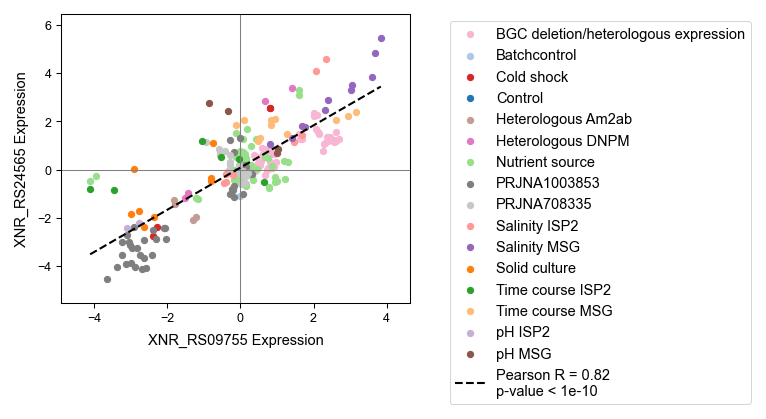

In [137]:
compare_expression(ica_data,'XNR_RS09755', 'XNR_RS24565', colors=colors, groups=groups)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

# NRPS iron story

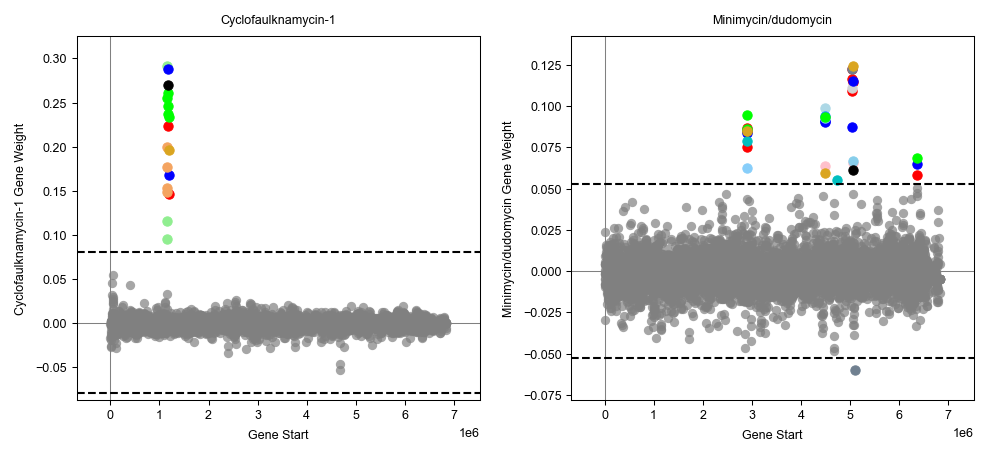

In [238]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['Cyclofaulknamycin-1', 'Minimycin/dudomycin']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the gene weights
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_gene_weights(ica_data, imodulons[i], show_labels=False, label_font_kwargs={'fontsize':6}, ax=ax, legend=False, scatter_kwargs={'s': 20})
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig('/Users/nilmat/Documents/streptsd/reports/figures/modulome/Fig4/gene_weights.svg', dpi=300)
plt.show()

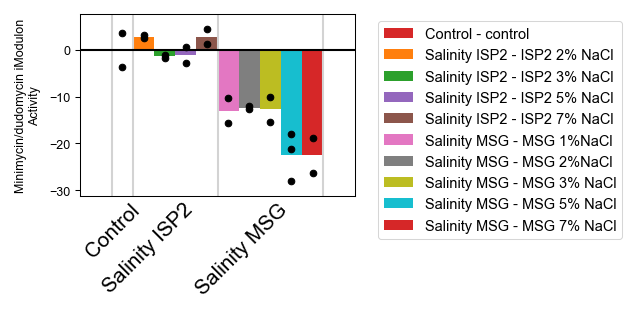

In [17]:
# Convert the page size from mm to inches
width = 60 / 25.4  # ~6.69 inches
height = 40 / 25.4  # ~3.94 inches

fig,ax = plt.subplots(figsize=(width, height))

# Generate 16 colors from the 'tab20' colormap
colors = plt.cm.tab20(range(16))

# Assuming plot_activities is modified to accept an axis object
plot_activities(ica_data, 'Minimycin/dudomycin', 
                projects=['Control', 'Salinity ISP2', 'Salinity MSG'], 
                highlight=['Control', 'Salinity ISP2', 'Salinity MSG'],
                ax=ax)  # Pass the ax object here

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
#ax.set_xlabel('Surugamide repressor', fontsize=6)
#ax.set_ylabel('Surugamide', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

plt.savefig(path.join(figure_dir,'minimycin_activity.svg'))

In [158]:
ica_data.sample_table

sample_id               strain  benchling_strain_id  \
Control1-MSG    Control1-MSG                J1074                  NaN   
Control2-MSG    Control2-MSG                J1074                  NaN   
L-galactose-1  L-galactose-1                J1074                  NaN   
L-galactose-2  L-galactose-2                J1074                  NaN   
MSG-1A                MSG-1A                J1074                  NaN   
...                      ...                  ...                  ...   
SRX10298369      SRX10298369  J1074/R2_Delta-bkdR                  NaN   
SRX10298370      SRX10298370  J1074/R2_Delta-bkdR                  NaN   
SRX10298362      SRX10298362             J1074/R2                  NaN   
SRX10298363      SRX10298363             J1074/R2                  NaN   
SRX10298364      SRX10298364             J1074/R2                  NaN   

                 project               condition incubation_time temperature  \
Control1-MSG     Control                 control             30h         30C   
Control2-MSG     Control                 control             30h         30C   
L-galactose-1   Azenta01             L-galactose             NaN         30C   
L-galactose-2   Azenta01             L-galactose             NaN         30C   
MSG-1A          Azenta01    Monosodium glutamate             NaN         30C   
...                  ...                     ...             ...         ...   
SRX10298369    Pamamycin  pp_30h_bkdR_L_valanine             30h          Na   
SRX10298370    Pamamycin  pp_30h_bkdR_L_valanine             30h          Na   
SRX10298362    Pamamycin       pp_30h_L_valanine             30h          Na   
SRX10298363    Pamamycin       pp_30h_L_valanine             30h          Na   
SRX10298364    Pamamycin       pp_30h_L_valanine             30h          Na   

              special_condition  od_600  \
Control1-MSG              Beads     2.7   
Control2-MSG             Spring     3.3   
L-galactose-1                Na     NaN   
L-galactose-2                Na     NaN   
MSG-1A                       Na     NaN   
...                         ...     ...   
SRX10298369                  Na     NaN   
SRX10298370                  Na     NaN   
SRX10298362                  Na     NaN   
SRX10298363                  Na     NaN   
SRX10298364                  Na     NaN   

                                                           notes  ...  \
Control1-MSG   sample_id: (carbon source)-(biological replica...  ...   
Control2-MSG   sample_id: (carbon source)-(biological replica...  ...   
L-galactose-1  Samples were mistakenly labelled "L-glutamate"...  ...   
L-galactose-2  Samples were mistakenly labelled "L-glutamate"...  ...   
MSG-1A         sample_id: (carbon source)-(biological replica...  ...   
...                                                          ...  ...   
SRX10298369                                                  NaN  ...   
SRX10298370                                                  NaN  ...   
SRX10298362                                                  NaN  ...   
SRX10298363                                                  NaN  ...   
SRX10298364                                                  NaN  ...   

               passed_fastqc passed_reads_mapped_to_CDS  \
Control1-MSG            True                       True   
Control2-MSG            True                       True   
L-galactose-1           True                       True   
L-galactose-2           True                       True   
MSG-1A                  True                       True   
...                      ...                        ...   
SRX10298369             True                       True   
SRX10298370             True                       True   
SRX10298362             True                       True   
SRX10298363             True                       True   
SRX10298364             True                       True   

              passed_global_correlation   skip reference_condition

# Panel 5: Uncharacterized genes/iModulons

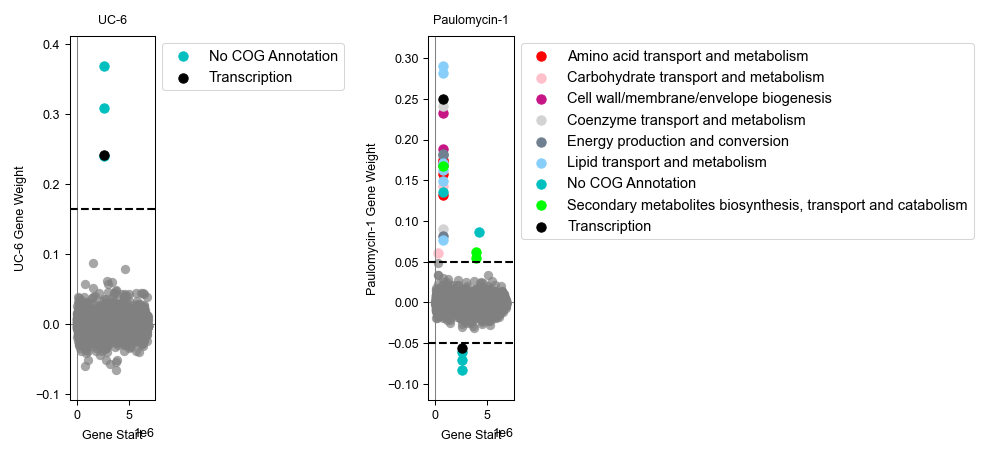

In [8]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['UC-6', 'Paulomycin-1']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the gene weights
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_gene_weights(ica_data, imodulons[i], show_labels=False, label_font_kwargs={'fontsize':6}, ax=ax, legend=True, scatter_kwargs={'s': 20})
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig('/Users/nilmat/Documents/streptsd/reports/figures/modulome/Fig6/gene_weights-legend.svg', dpi=300)
plt.show()

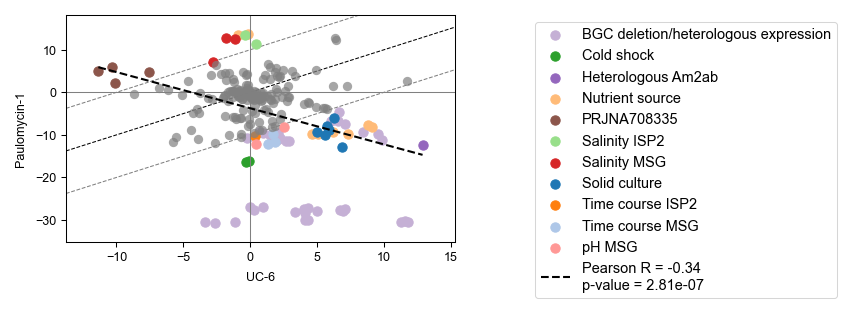

In [26]:
# Convert the page size from mm to inches
width = 85 / 25.4  # ~6.69 inches
height = 50 / 25.4  # ~3.94 inches

fig,ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

# Generate 16 colors from the 'tab20' colormap
colors = plt.cm.tab20(range(16))

compare_activities(ica_data,'UC-6','Paulomycin-1',
                   ax=ax,
                   line45=True,
                   fit_line=True,
                   line45_margin=10,
                   groups=groups,
                   colors = colors,
                   scatter_kwargs={'s': 20},
                   show_labels=False,
                   adjust_labels=False,
                   label_font_kwargs={'fontsize': 2})

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
ax.set_xlabel('UC-6', fontsize=6)
ax.set_ylabel('Paulomycin-1', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

plt.savefig('/Users/nilmat/Documents/cleanup/reports/figures/modulome/Fig6/paulo_UC6_phase.svg', dpi=300)

plt.show()

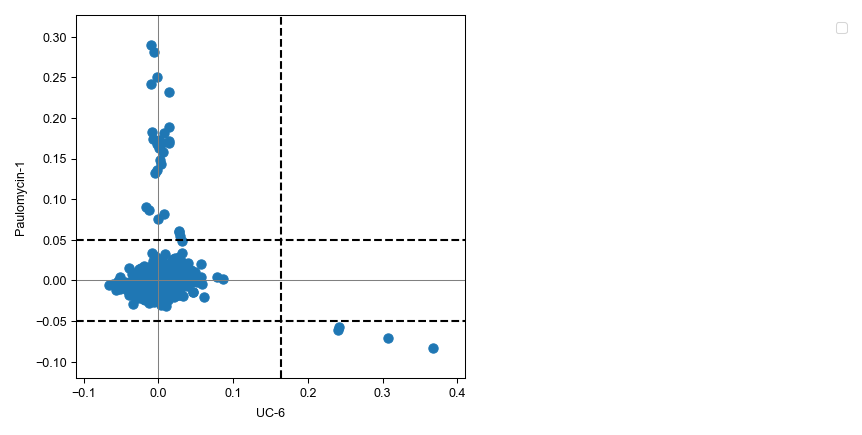

In [58]:
# Convert the page size from mm to inches
width = 85 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

fig,ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

# Generate 16 colors from the 'tab20' colormap
colors = plt.cm.tab20(range(16))

compare_gene_weights(ica_data, 'UC-6', 'Paulomycin-1', 
                     scatter_kwargs={'s': 20},
                     show_labels=False,
                     label_font_kwargs={'fontsize': 6}, 
                     ax_font_kwargs={'fontsize': 6},
                     ax=ax)

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
ax.set_xlabel('UC-6', fontsize=6)
ax.set_ylabel('Paulomycin-1', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

plt.savefig('/Users/nilmat/Documents/streptsd/reports/figures/modulome/Fig6/paulo_UC6_compare_weights.svg', dpi=300)

plt.show()

<Figure size 15000x12000 with 0 Axes>

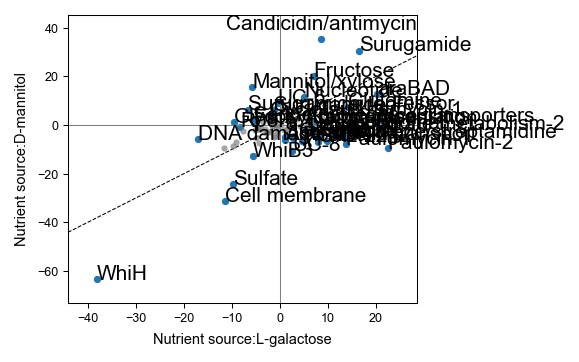

In [10]:
# Set the figure size to make it larger and more spread out
plt.figure(figsize=(100, 80))  # Adjust the width and height as needed
plot_dima(ica_data, 'Nutrient source:L-galactose', 'Nutrient source:D-mannitol',  show_labels=False, adjust_labels=True, label_font_kwargs={'fontsize': 4})
plt.show()  # Display the subplot

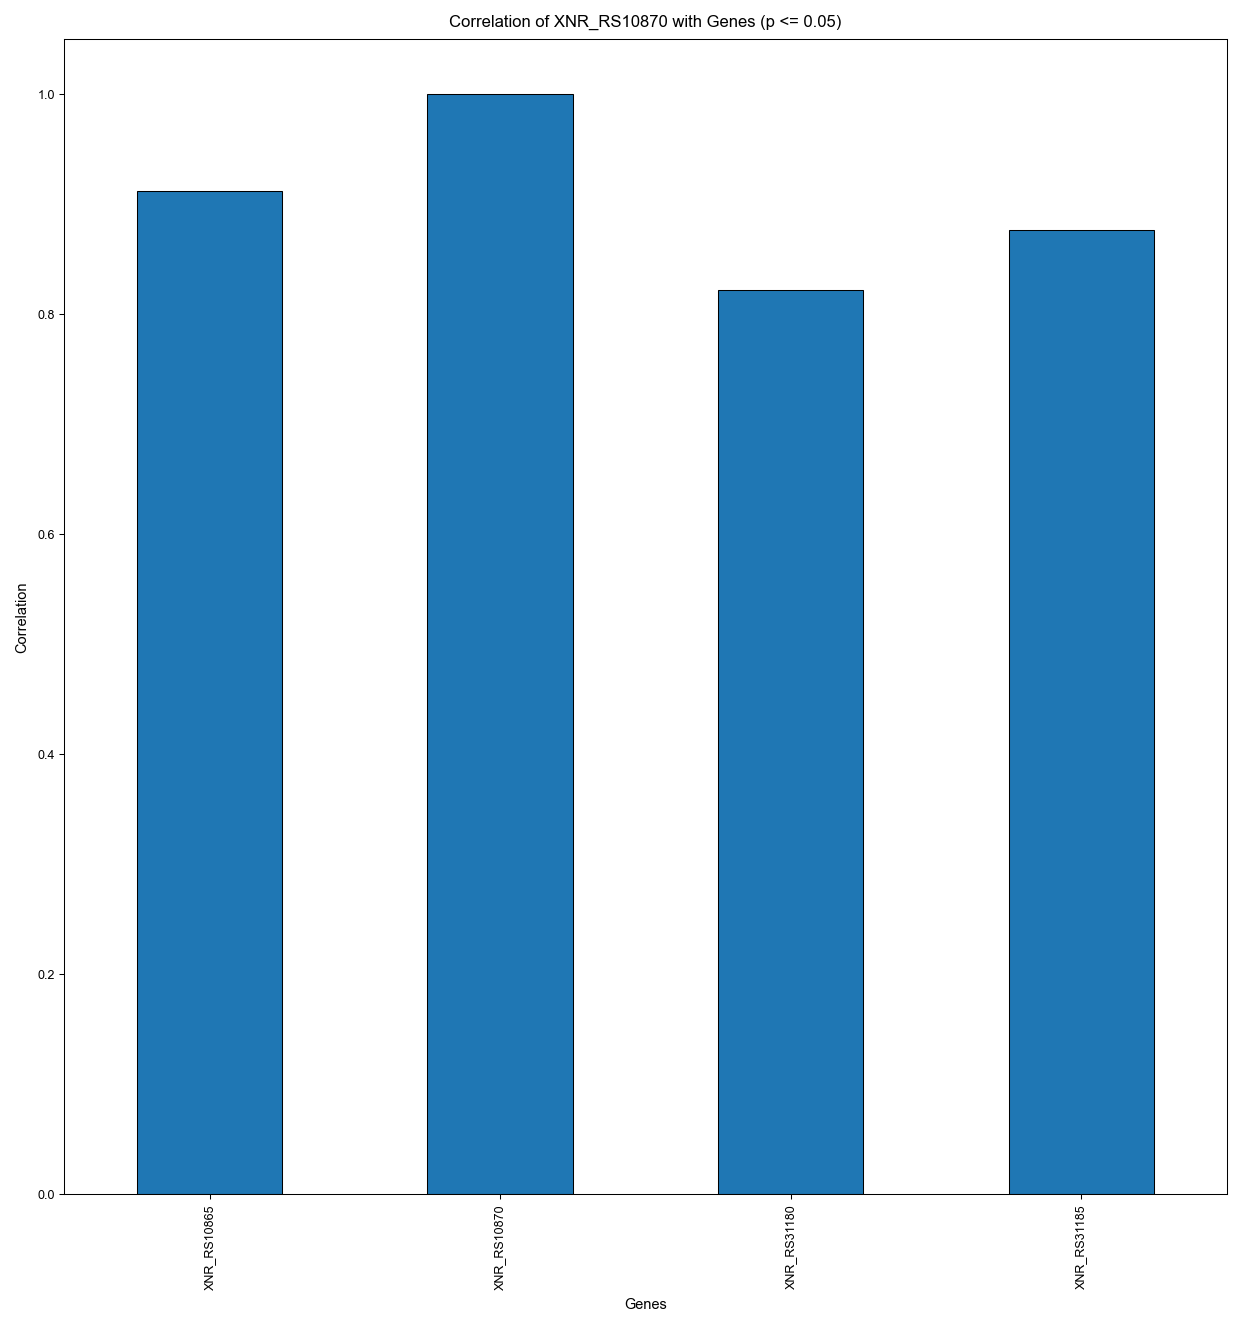

In [19]:
correlation_df = pd.read_csv('../../data/processed/modulome/tf_correlation.csv', index_col=0)

# Choose a sigma factor
tf = 'XNR_RS10870'

# Get the correlations for the chosen tf
correlations = correlation_df[tf]

# filter genes for the top ten highest correlation and top ten lowest correlations
significant_genes = correlations[correlations.abs() > 0.8]

# Create a bar plot
plt.figure(figsize=(10, 10))
significant_genes.plot(kind='bar')
plt.title(f'Correlation of {tf} with Genes (p <= 0.05)')
plt.xlabel('Genes')
plt.ylabel('Correlation')
plt.show()

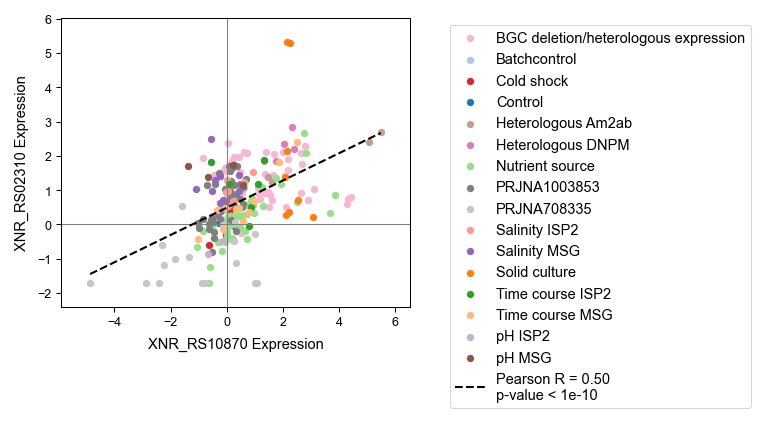

In [18]:
compare_expression(ica_data,'XNR_RS10870', 'XNR_RS02310', colors=colors, groups=groups)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


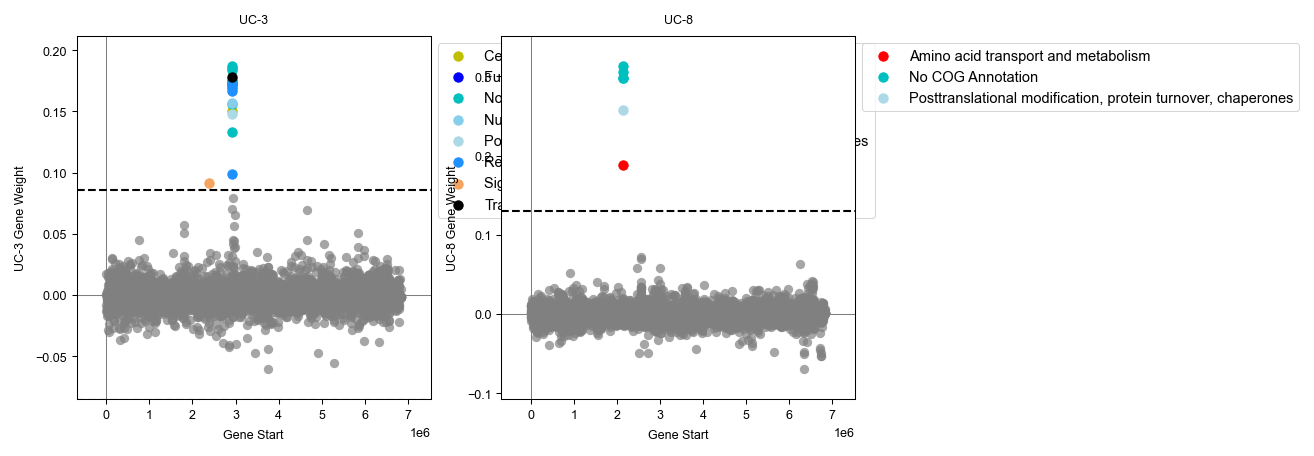

In [6]:
# Set the svg.fonttype parameter to 'none'
plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['UC-3', 'UC-8']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the gene weights
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_gene_weights(ica_data, imodulons[i], show_labels=False, label_font_kwargs={'fontsize':6}, ax=ax, legend=True, scatter_kwargs={'s': 20})
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig('/Users/nilmat/Documents/streptsd/reports/figures/modulome/Fig6/UC-3_gene_weights-legend.svg', dpi=300)
plt.show()

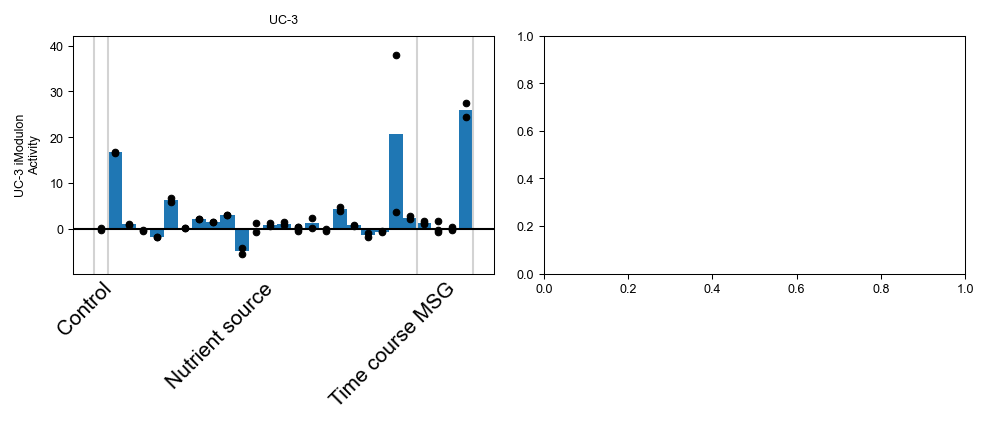

In [24]:
# Set the svg.fonttype parameter to 'none'
from cProfile import label


plt.rcParams['svg.fonttype'] = 'none'

# Convert the page size from mm to inches
width = 170 / 25.4  # ~6.69 inches
height = 75 / 25.4  # ~3.94 inches

# Define a list of imodulons
imodulons = ['UC-3']

# Create a grid of subplots with two columns
fig, axs = plt.subplots(len(imodulons)//2 + len(imodulons)%2, 2, figsize=(width, height))

# Loop over the subplots and plot the activities
for i, ax in enumerate(axs.flat):
    if i < len(imodulons):
        plot_activities(ica_data, imodulons[i], ax=ax, projects=['Control', 'Time course MSG', 'Nutrient source'])
        ax.set_title(imodulons[i], fontsize=6)

        # Increase x and y axis text size
        ax.tick_params(axis='both', which='major', labelsize=6)

        # Increase x and y axis label size
        ax.set_xlabel(ax.get_xlabel(), fontsize=6)
        ax.set_ylabel(ax.get_ylabel(), fontsize=6)

        # Remove legend
        #if ax.get_legend():
        #    ax.get_legend().remove()
    #else:
        #ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.savefig('/Users/nilmat/Documents/streptsd/reports/figures/modulome/Fig6/UC3_activities.svg', dpi=300)
plt.show()

In [28]:
for imodulon in ['UC-3', 'UC-6']:
    df = ica_data.view_imodulon(imodulon)

    # Identify the genes with unknown function
    unknown_genes = df[df['COG'].isin(['Function unknown', 'No COG Annotation'])]

    # Count the number of uncharacterized genes
    unknown_genes_count = len(unknown_genes)

    # Count the total number of genes
    total_genes_count = len(df)

    # Calculate the percentage of genes with unknown function
    percentage_unknown = (unknown_genes_count / total_genes_count) * 100

    print(f'{imodulon} contains {percentage_unknown:.2f}% uncharacterized genes')

UC-3 contains 60.00% uncharacterized genes
UC-6 contains 75.00% uncharacterized genes


# Uncharacterized genes

The genome contains 40.9902130109384 uncharacterized genes in iModulons


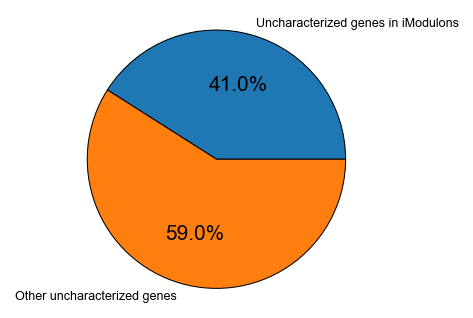

In [29]:
# Identify the number of uncharacterized genes in the genome that belong to iModulons
unknown_genes_set = set()
for imodulon in ica_data.imodulon_names:
    df = ica_data.view_imodulon(imodulon)

    # Identify the genes with unknown function
    unknown_genes = df[df['COG'].isin(['Function unknown', 'No COG Annotation'])]

    # Count the number of uncharacterized genes
    unknown_genes_set.update(unknown_genes.index)

# Count the unique number of uncharacterized genes in iModulons
unique_unknown_genes = len(unknown_genes_set)

# Identify the total number of uncharacterized genes in the genome
total_unknown_genes = len(ica_data.gene_table[ica_data.gene_table['COG'].isin(['Function unknown', 'No COG Annotation'])])

# Calculate the percentage of uncharacterized genes in iModulons
percentage_unknown = (unique_unknown_genes / total_unknown_genes) * 100

print(f'The genome contains {percentage_unknown} uncharacterized genes in iModulons')

# Create a pie chart
labels = ['Uncharacterized genes in iModulons', 'Other uncharacterized genes']
sizes = [unique_unknown_genes, total_unknown_genes - unique_unknown_genes]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

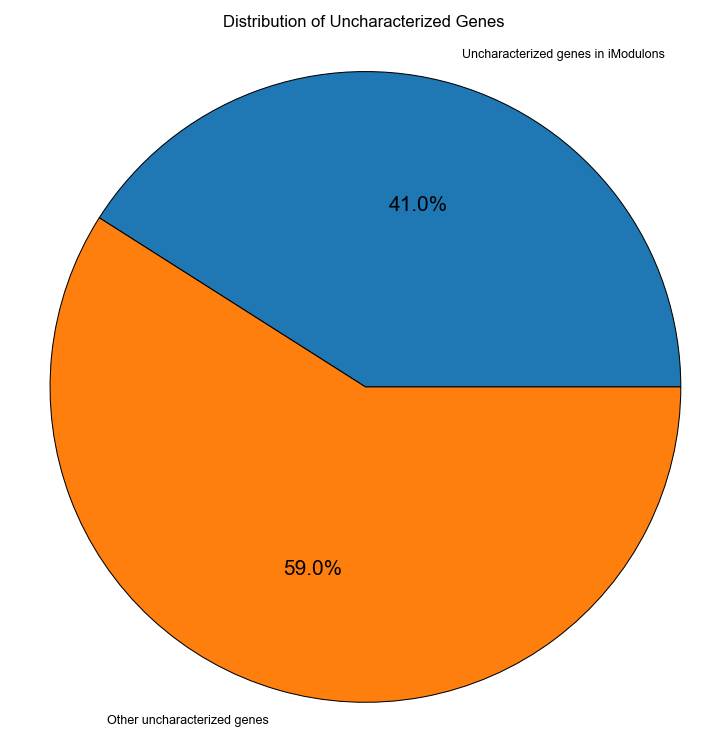

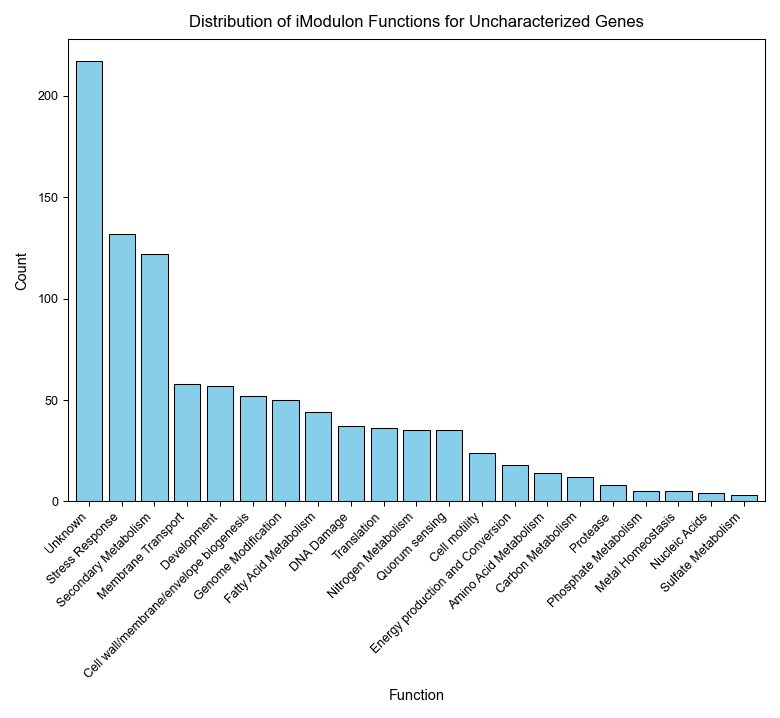

In [30]:
import matplotlib.pyplot as plt

# Identify the number of uncharacterized genes in the genome that belong to iModulons
unknown_genes_set = set()
unknown_genes_functions = []
for imodulon in ica_data.imodulon_names:
    df = ica_data.view_imodulon(imodulon)

    # Identify the genes with unknown function
    unknown_genes = df[df['COG'].isin(['Function unknown', 'No COG Annotation'])]

    # Count the number of uncharacterized genes
    unknown_genes_set.update(unknown_genes.index)

    # Store the functions of the imodulons containing uncharacterized genes
    if not unknown_genes.empty:
        function = ica_data.imodulon_table.loc[imodulon, 'function']
        unknown_genes_functions.extend([function]*len(unknown_genes))

# Count the unique number of uncharacterized genes in iModulons
unique_unknown_genes = len(unknown_genes_set)

# Identify the total number of uncharacterized genes in the genome
total_unknown_genes = len(ica_data.gene_table[ica_data.gene_table['COG'].isin(['Function unknown', 'No COG Annotation'])])

# Create a pie chart for the total number of uncharacterized genes
labels = ['Uncharacterized genes in iModulons', 'Other uncharacterized genes']
sizes = [unique_unknown_genes, total_unknown_genes - unique_unknown_genes]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Uncharacterized Genes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Create a bar chart for the distribution of imodulon functions for uncharacterized genes
plt.figure(figsize=(6, 4))
pd.Series(unknown_genes_functions).value_counts().plot(kind='bar', width=0.8, color='skyblue')
plt.title('Distribution of iModulon Functions for Uncharacterized Genes')
plt.xlabel('Function')
plt.ylabel('Count')
# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
# savefig
#plt.savefig('/Users/nilmat/Documents/conferences/future_scientist2024/figures/unknown_genes.svg')
plt.show()

In [31]:
total_unknown_genes

1737

In [32]:
unique_unknown_genes

712

# Supplemental Figure 3

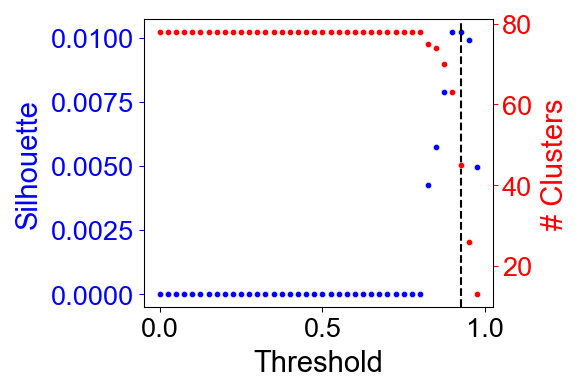

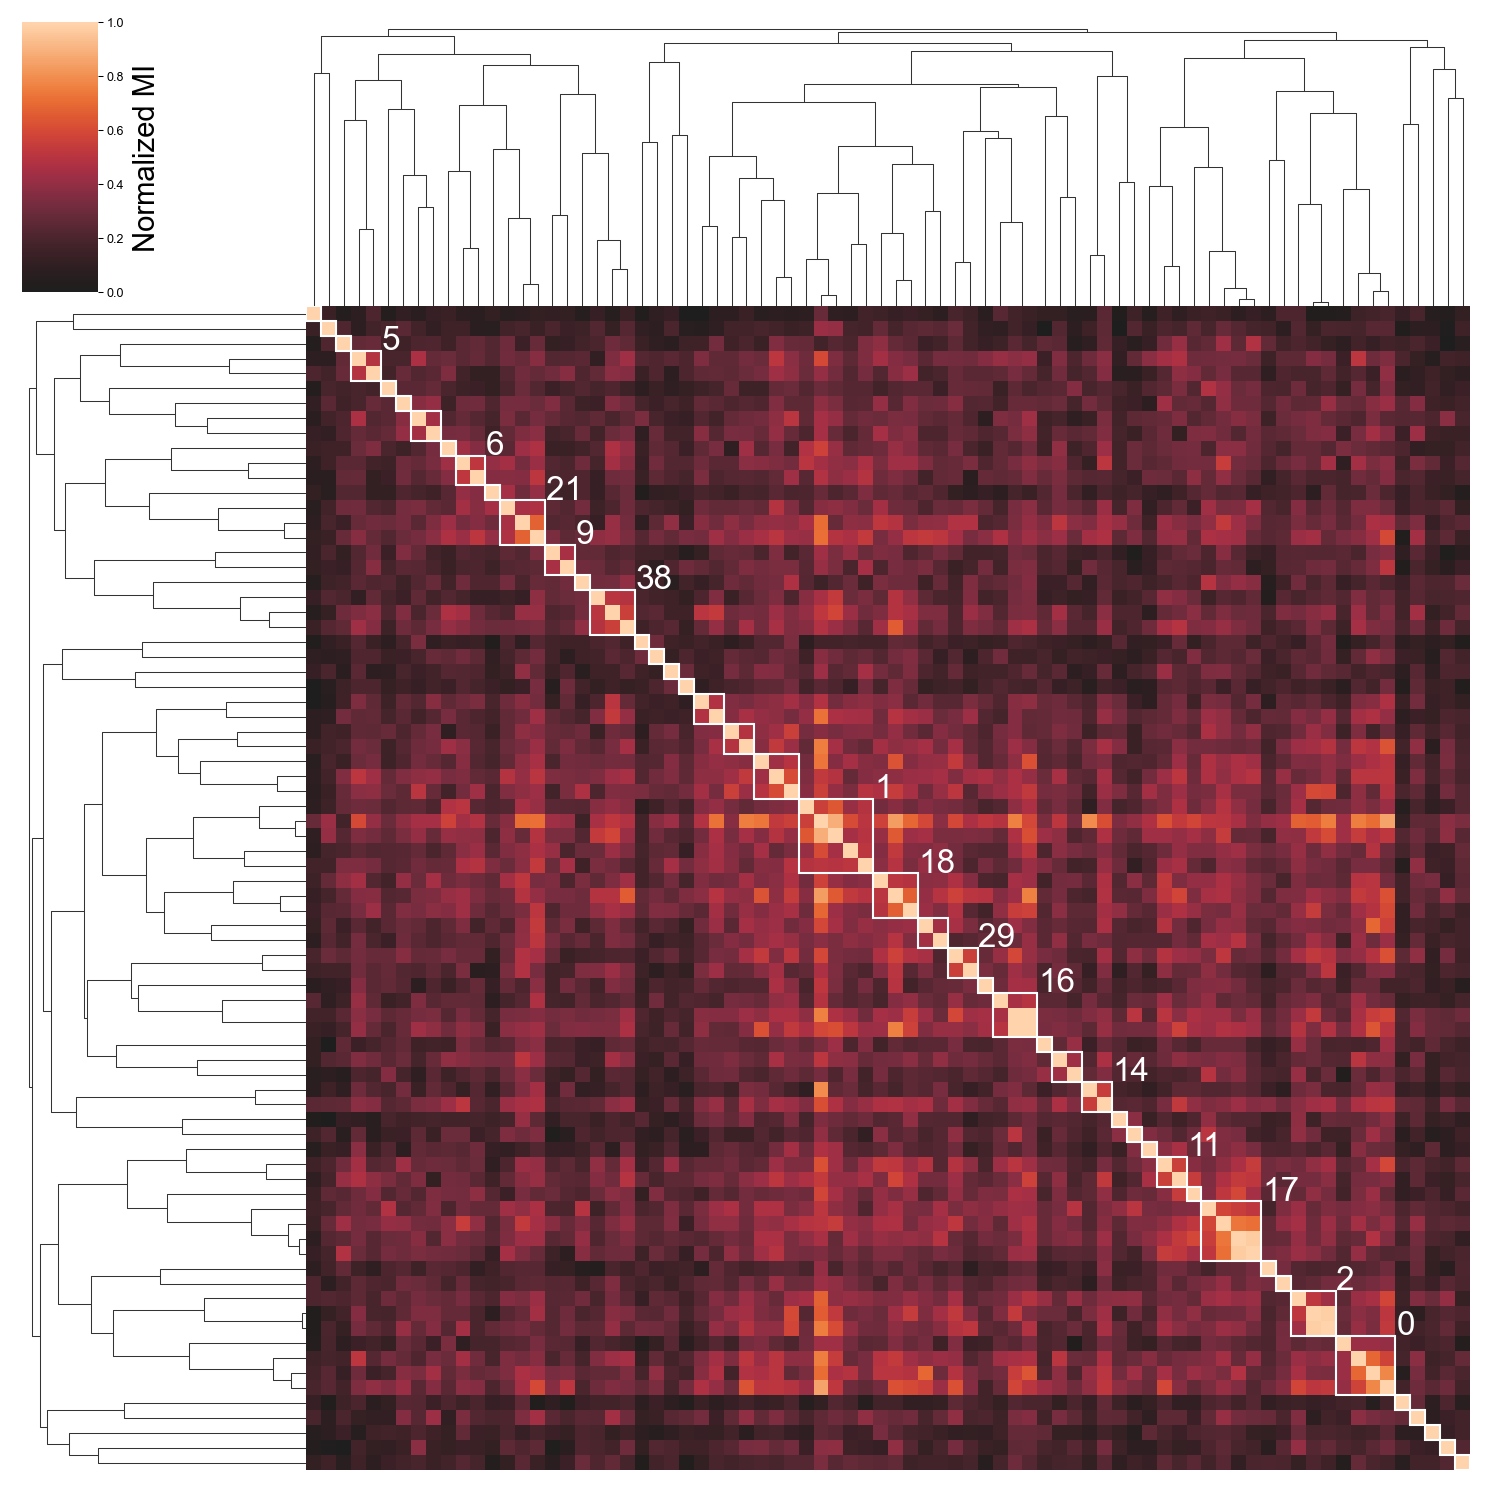

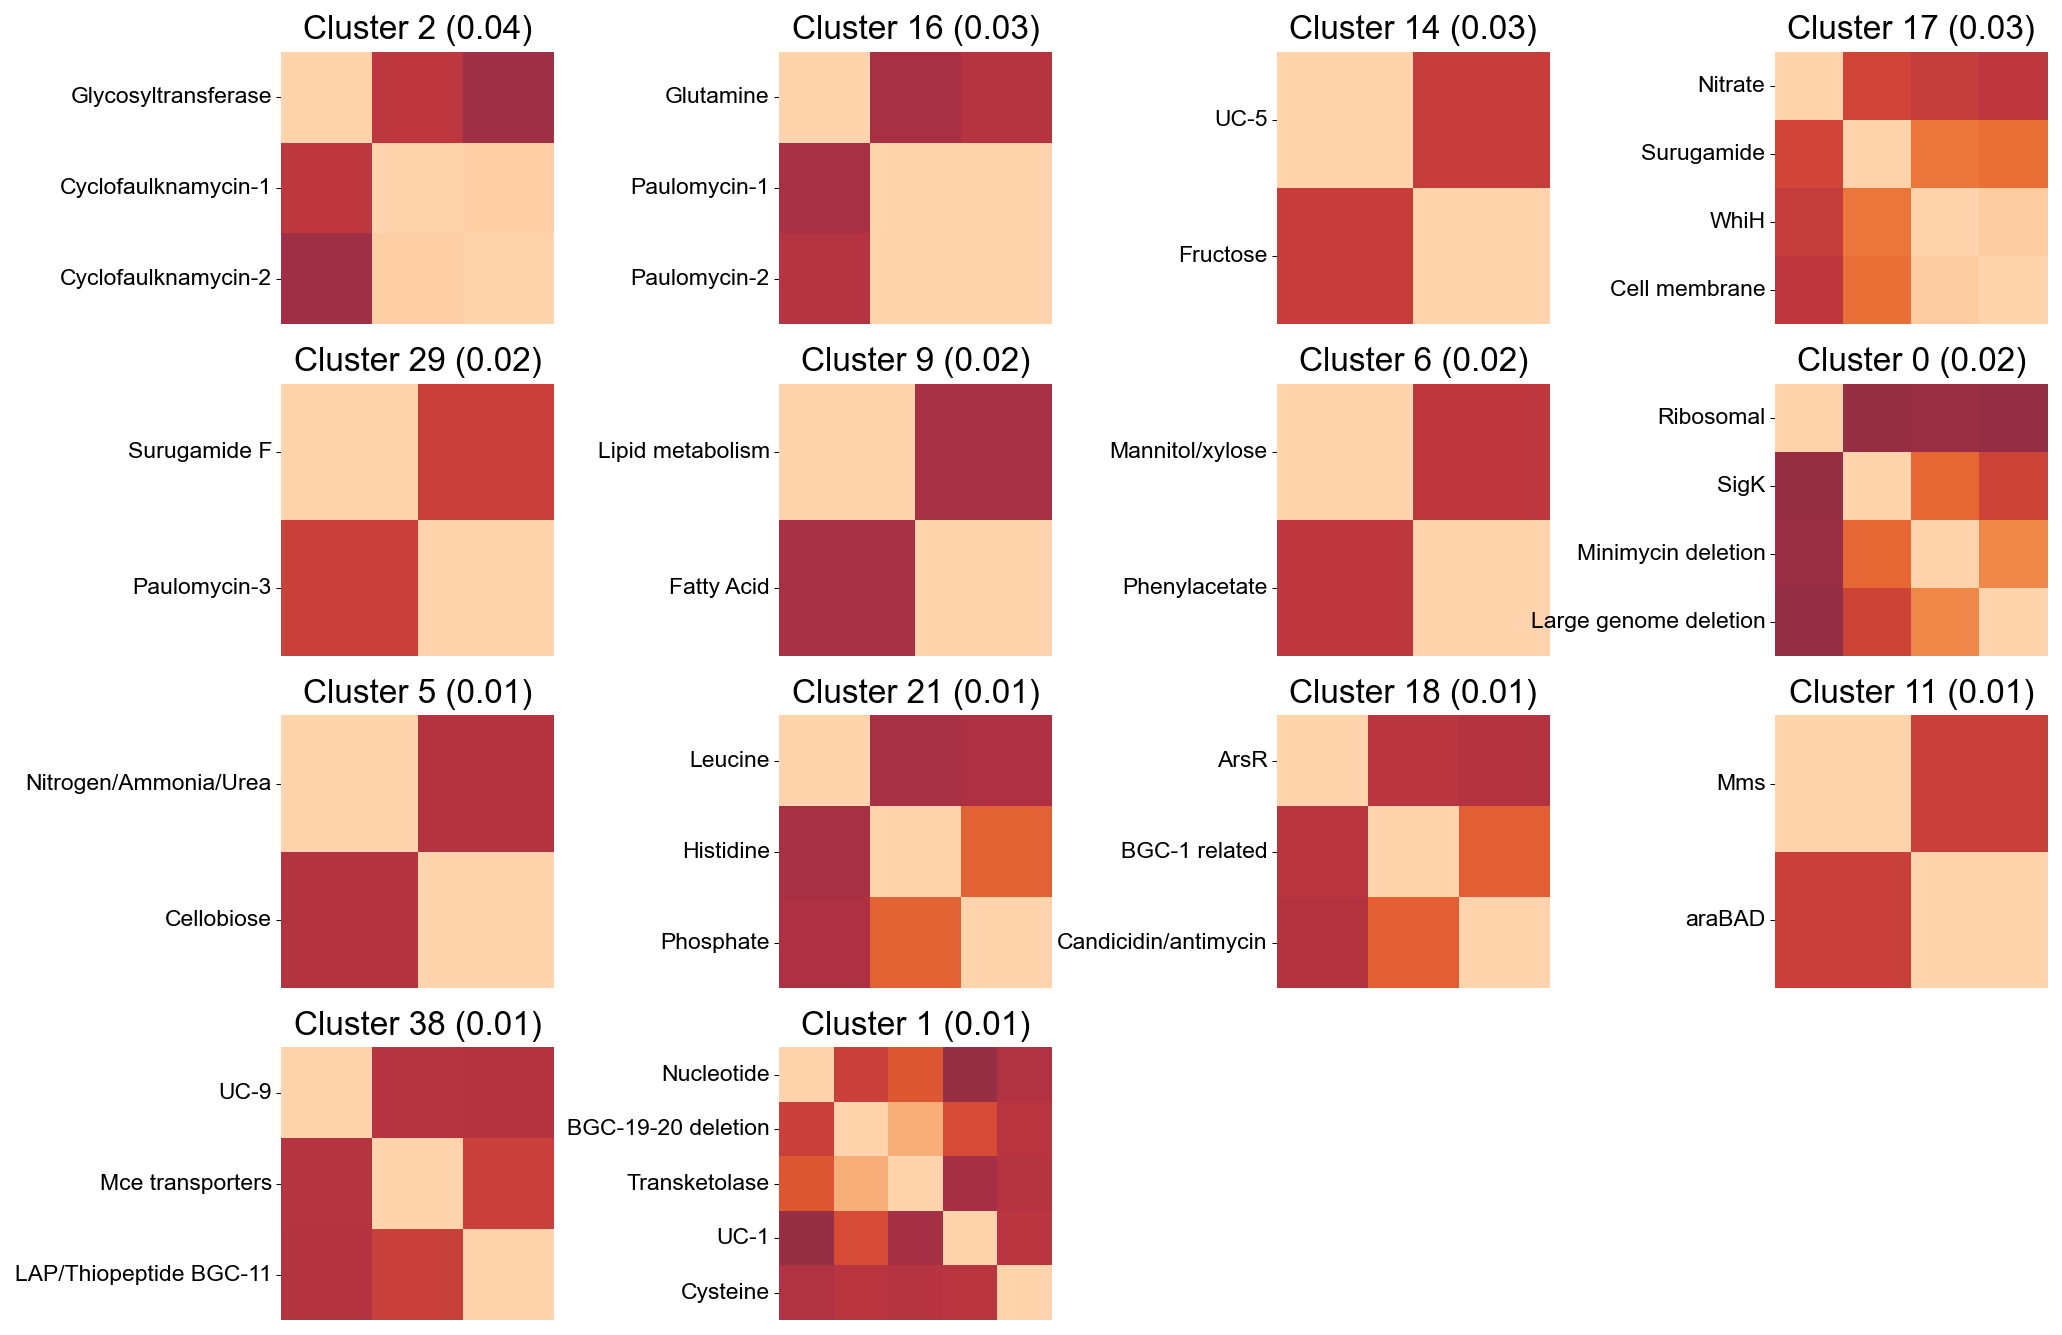

In [34]:
cmap,cg = cluster_activities(ica_data, show_best_clusters=True,show_thresholding=True,
                             cluster_names={},
                             return_clustermap=True,
                             correlation_method='mutual_info')

#cg.savefig(path.join('raw_figures','FigS3a_clustermap.png'))    
#plt.savefig(path.join('raw_figures','FigS3b_clustermap.png'))

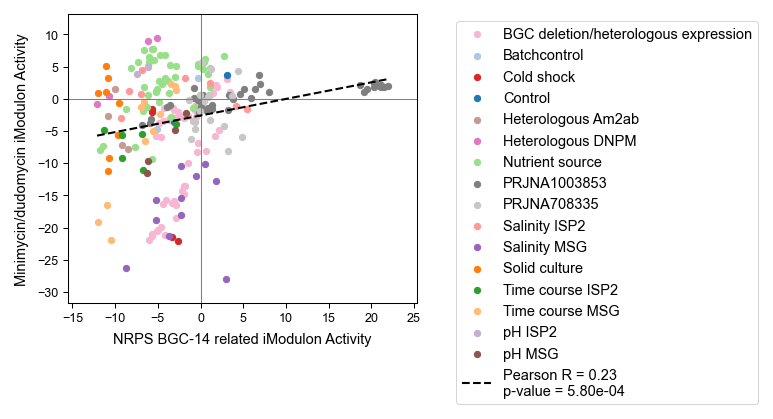

In [227]:
compare_activities(ica_data,'NRPS BGC-14 related','Minimycin/dudomycin',colors=colors,groups=groups)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

# Nutrient source iMs and mapping

In [28]:
# Define list of iMs related to Nutrient utilization
nutrient_ims = ['Cysteine', 'Leucine', 'Glutamine', 'Histidine', 'Phenylacetate', 'Carbohydrate metabolism-1', 'Carbohydrate metabolism-2', 'Glycosyltransferase',
                'Fructose', 'Mannitol/xylose', 'Cellobiose', 'Glycerol', 'Sucrose', 'zwf', 'Fatty Acid']

# Define the list of samples that tested Nutrient sources
nutrient_samples = ica_data.sample_table[ica_data.sample_table['project'] == 'Nutrient source'].index

# Create a DataFrame to store the activities of the iMs related to Nutrient utilization
nutrient_activities = pd.DataFrame(columns=nutrient_samples)

# Loop over the iMs related to Nutrient utilization
for im in nutrient_ims:
    # Check if the iM exists in the DataFrame index
    if im in ica_data.A.index:
        # Get the activities of the current iM for the samples that tested Nutrient sources
        im_activities = ica_data.A.loc[im, nutrient_samples]
    
        # Add the activities to the DataFrame
        nutrient_activities.loc[im] = im_activities
    else:
        print(f"{im} not found in DataFrame index.")

nutrient_activities


5_Arabinose_MM  6_Arabinose_MM  29-Asparagine  \
Cysteine                         2.431903        1.893918       1.721193   
Leucine                         -0.623216       -1.432108       1.012281   
Glutamine                       -1.301230       -1.420307       5.482908   
Histidine                       -2.421280       -2.496709      -1.216932   
Phenylacetate                   -2.983304       -3.548217       1.032242   
Carbohydrate metabolism-1       -1.039042       -1.067025      -0.713311   
Carbohydrate metabolism-2        2.070600        1.597610       0.676902   
Glycosyltransferase             -4.045483       -4.962426       8.554641   
Fructose                         5.516402        5.762212      -1.304175   
Mannitol/xylose                 -4.358918       -4.996028      -2.865346   
Cellobiose                       3.151230        2.539965      -1.940324   
Glycerol                         1.779855        1.280757      -1.303505   
Sucrose                         -0.708526       -1.626042       1.761009   
zwf                             -0.063188       -1.018781       0.039380   
Fatty Acid                      -1.338503       -2.810438      -0.985288   

                           30-Asparagine  138-Dcellobiose  140-Dcellobiose  \
Cysteine                        0.009369         4.914926         3.493561   
Leucine                         0.814648         3.760021         3.447378   
Glutamine                       7.476525        -2.072896        -1.988843   
Histidine                      -1.015371        -1.736221        -2.823820   
Phenylacetate                  -1.997973        -1.042367        -1.137332   
Carbohydrate metabolism-1       4.155190         0.312754        -0.763703   
Carbohydrate metabolism-2       3.752268         2.604535         1.791568   
Glycosyltransferase            13.023291        -6.001934        -4.875011   
Fructose                       -1.282354         2.548249         2.007502   
Mannitol/xylose                 0.272948        -2.304105        -2.045503   
Cellobiose                     -0.175625        37.025256        37.201950   
Glycerol                       -1.834696        -2.925436        -2.933867   
Sucrose                         0.703348         2.008239         1.499554   
zwf                            -0.356430        -0.107205        -0.087423   
Fatty Acid                     -3.080260         2.529596         1.562120   

                           1_Mannitol_MM  2_Mannitol_MM   333-DNPM   334-DNPM  \
Cysteine                        1.249871       0.563371 -17.475600 -17.298636   
Leucine                        -0.656698      -0.302911 -13.234558  -6.617409   
Glutamine                       6.152383       8.728645  16.599629  12.767472   
Histidine                      -2.162463      -1.257517   1.114097   1.045737   
Phenylacetate                  -1.503284      -1.560242  21.673968  19.924535   
Carbohydrate metabolism-1       0.252323      -0.575600  11.424022  13.698760   
Carbohydrate metabolism-2      -1.878775      -1.973864   6.265678   5.382366   
Glycosyltransferase             1.385730       0.979936   9.373375   8.909802   
Fructose                       19.808974      20.181524   2.416414   0.806305   
Mannitol/xylose                15.699066      15.426771 -10.369510 -10.346639   
Cellobiose                      5.449481       5.866969   3.378567   3.345051   
Glycerol                       -4.278897      -3.436253   2.213774   3.965019   
Sucrose                        -0.600216      -1.477911   0.734941   1.192820   
zwf                            -0.244807      -0.741149  -0.538011  -1.523486   
Fatty Acid                     -0.205330       1.478398   4.995229   3.860625   

                           ...  282-Sucrose  283-Sucrose  205-Tween20  \
Cysteine                   ...    -1.057326     0.098380     1.317781   
Leucine                    ...    -1.768792     0.339366     2.250816   
Glutamine                  ...    -2.113092  

Text(0.5, -33.583333333333265, '')

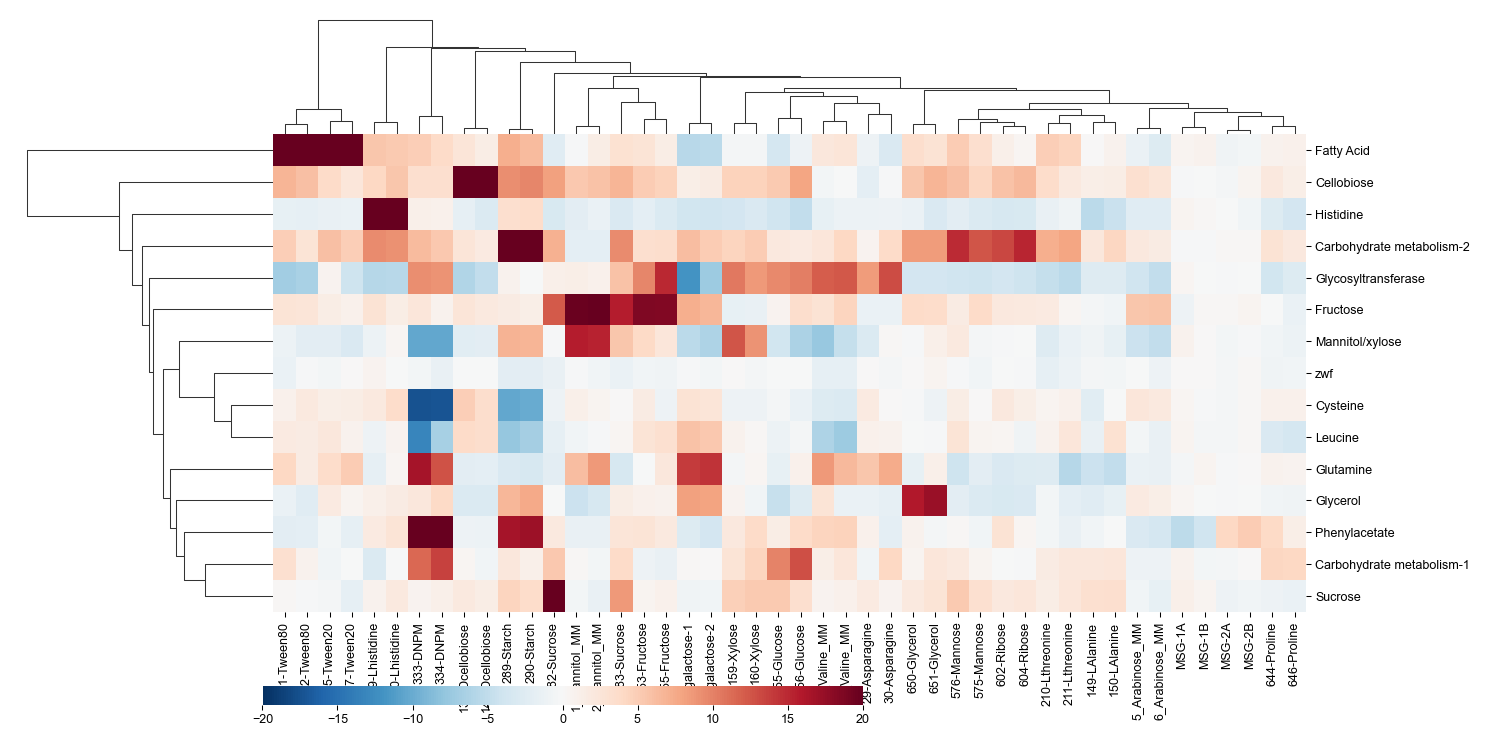

In [29]:
cg = sns.clustermap(nutrient_activities,
               center=0,
               col_cluster=True,
               cmap='RdBu_r',
               figsize=(10,5),
               cbar_pos=(0.18,0.05,.4,.025),
               cbar_kws={'orientation':'horizontal'},
               vmin=-20,  # set lower bound
               vmax=20)   # set upper bound
cg.ax_heatmap.set_xlabel('')

In [6]:
ica_data.view_imodulon('Minimycin/dudomycin')

gene_weight    gene_name  \
XNR_RS12475     0.075497         ectB   
XNR_RS12480     0.078651  XNR_RS12480   
XNR_RS12485     0.094544  XNR_RS12485   
XNR_RS12490     0.086584  XNR_RS12490   
XNR_RS12495     0.085121  XNR_RS12495   
XNR_RS12500     0.083970  XNR_RS12500   
XNR_RS12505     0.085110  XNR_RS12505   
XNR_RS30800     0.085003  XNR_RS30800   
XNR_RS12515     0.086404  XNR_RS12515   
XNR_RS12520     0.062661  XNR_RS12520   
XNR_RS19550     0.098638  XNR_RS19550   
XNR_RS19555     0.090770  XNR_RS19555   
XNR_RS19560     0.093106  XNR_RS19560   
XNR_RS19565     0.093924  XNR_RS19565   
XNR_RS19570     0.093572  XNR_RS19570   
XNR_RS19575     0.090299  XNR_RS19575   
XNR_RS19580     0.059284  XNR_RS19580   
XNR_RS19585     0.063768  XNR_RS19585   
XNR_RS20695     0.055136  XNR_RS20695   
XNR_RS21950     0.087435  XNR_RS21950   
XNR_RS21955     0.111309  XNR_RS21955   
XNR_RS21960     0.109263  XNR_RS21960   
XNR_RS21965     0.116776  XNR_RS21965   
XNR_RS21970     0.122469  XNR_RS21970   
XNR_RS21975     0.122489  XNR_RS21975   
XNR_RS21980     0.114433         ilvE   
XNR_RS21985     0.115047  XNR_RS21985   
XNR_RS21990     0.124129  XNR_RS21990   
XNR_RS22000     0.061157  XNR_RS22000   
XNR_RS22005     0.066586  XNR_RS22005   
XNR_RS22010     0.065679  XNR_RS22010   
XNR_RS22195    -0.059874         citN   
XNR_RS27935     0.058433  XNR_RS27935   
XNR_RS27940     0.065223  XNR_RS27940   
XNR_RS27945     0.068829         indC   

                                                    eggNOG_OGs  \
XNR_RS12475  COG0160@1|root,COG0160@2|Bacteria,2GKUY@201174...   
XNR_RS12480  2EXRR@1|root,33R15@2|Bacteria,2GP0Q@201174|Act...   
XNR_RS12485  COG3486@1|root,COG3486@2|Bacteria,2GKTG@201174...   
XNR_RS12490  COG0665@1|root,COG0665@2|Bacteria,2IG8X@201174...   
XNR_RS12495  COG0143@1|root,COG0662@1|root,COG0143@2|Bacter...   
XNR_RS12500  COG2329@1|root,COG2329@2|Bacteria,2GTB1@201174...   
XNR_RS12505  COG0644@1|root,COG0644@2|Bacteria,2GJDF@201174...   
XNR_RS30800  COG0236@1|root,COG0607@1|root,COG0236@2|Bacter...   
XNR_RS12515  COG1020@1|root,COG1020@2|Bacteria,2IA96@201174...   
XNR_RS12520  COG0657@1|root,COG0657@2|Bacteria,2IBTC@201174...   
XNR_RS19550  COG3555@1|root,COG3555@2|Bacteria,2ICJH@201174...   
XNR_RS19555  COG2232@1|root,COG2232@2|Bacteria,2I3K8@201174...   
XNR_RS19560  COG0151@1|root,COG0151@2|Bacteria,2GR5Q@201174...   
XNR_RS19565  COG4221@1|root,COG4221@2|Bacteria,2GP05@201174...   
XNR_RS19570  COG1020@1|root,COG1020@2|Bacteria,2IDCK@201174...   
XNR_RS19575  29QIV@1|root,30BIC@2|Bacteria,2IHKH@201174|Act...   
XNR_RS19580  COG3146@1|root,COG3146@2|Bacteria,2IK34@201174...   
XNR_RS19585  COG2211@1|root,COG2211@2|Bacteria,2I2UY@201174...   
XNR_RS20695  29A10@1|root,2ZX2I@2|Bacteria,2GQIF@201174|Act...   
XNR_RS21950  COG2308@1|root,COG2308@2|Bacteria,2GP4E@201174...   
XNR_RS21955  COG0189@1|root,COG0189@2|Bacteria,2I33Z@201174...   
XNR_RS21960  COG3483@1|root,COG3483@2|Bacteria,2ICER@201174...   
XNR_RS21965  COG0520@1|root,COG0520@2|Bacteria,2I9H7@201174...   
XNR_RS21970  COG3483@1|root,COG3483@2|Bacteria,2IAD5@201174...   
XNR_RS21975  COG0654@1|root,COG0654@2|Bacteria,2GKIN@201174...   
XNR_RS21980  COG0115@1|root,COG0115@2|Bacteria,2GKJ1@201174...   
XNR_RS21985  COG1878@1|root,COG1878@2|Bacteria,2GNFV@201174...   
XNR_RS21990                  COG2890@1|root,COG2890@2|Bacteria   
XNR_RS22000  COG0431@1|root,COG0431@2|Bacteria,2GNFR@201174...   
XNR_RS22005  COG0151@1|root,COG0151@2|Bacteria,2GKTF@201174...   
XNR_RS22010  COG2211@1|root,COG2211@2|Bacteria,2IDVV@201174...   
XNR_RS22195  COG2851@1|root,COG2851@2|Bacteria,2GNWE@201174...   
XNR_RS27935  COG0697@1|root,COG0697@2|Bacteria,2GMPB@201174...   
XNR_RS27940  COG0546@1|root,COG0546@2|Bacteria,2I9FC@201174...   
XNR_RS27945  COG1020@1|root,COG3319@1|root,COG1020@2|Bacter...   

                                                   Description GOs  \
XNR_RS12475  Belongs to the class-III pyridoxal-phosphate-d...   -   
XNR_RS12480        

In [7]:
# Convert the page size from mm to inches
width = 85 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

fig,ax = plt.subplots(figsize=(width, height))

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

# Generate 16 colors from the 'tab20' colormap
colors = plt.cm.tab20(range(16))

compare_expression(ica_data,'XNR_RS17095', 'XNR_RS17100', colors=colors, groups=groups,
                   scatter_kwargs={'s': 20})

# Increase x and y axis text size
ax.tick_params(axis='both', which='major', labelsize=6)

# Increase the x and y-axis label size
#ax.set_xlabel('Surugamide repressor', fontsize=6)
#ax.set_ylabel('Surugamide', fontsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

#plt.savefig(path.join(figure_dir,'surugamide_TFs_expr_correlation.svg'))    

TypeError: 'IcaData' object is not subscriptable

/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/Use

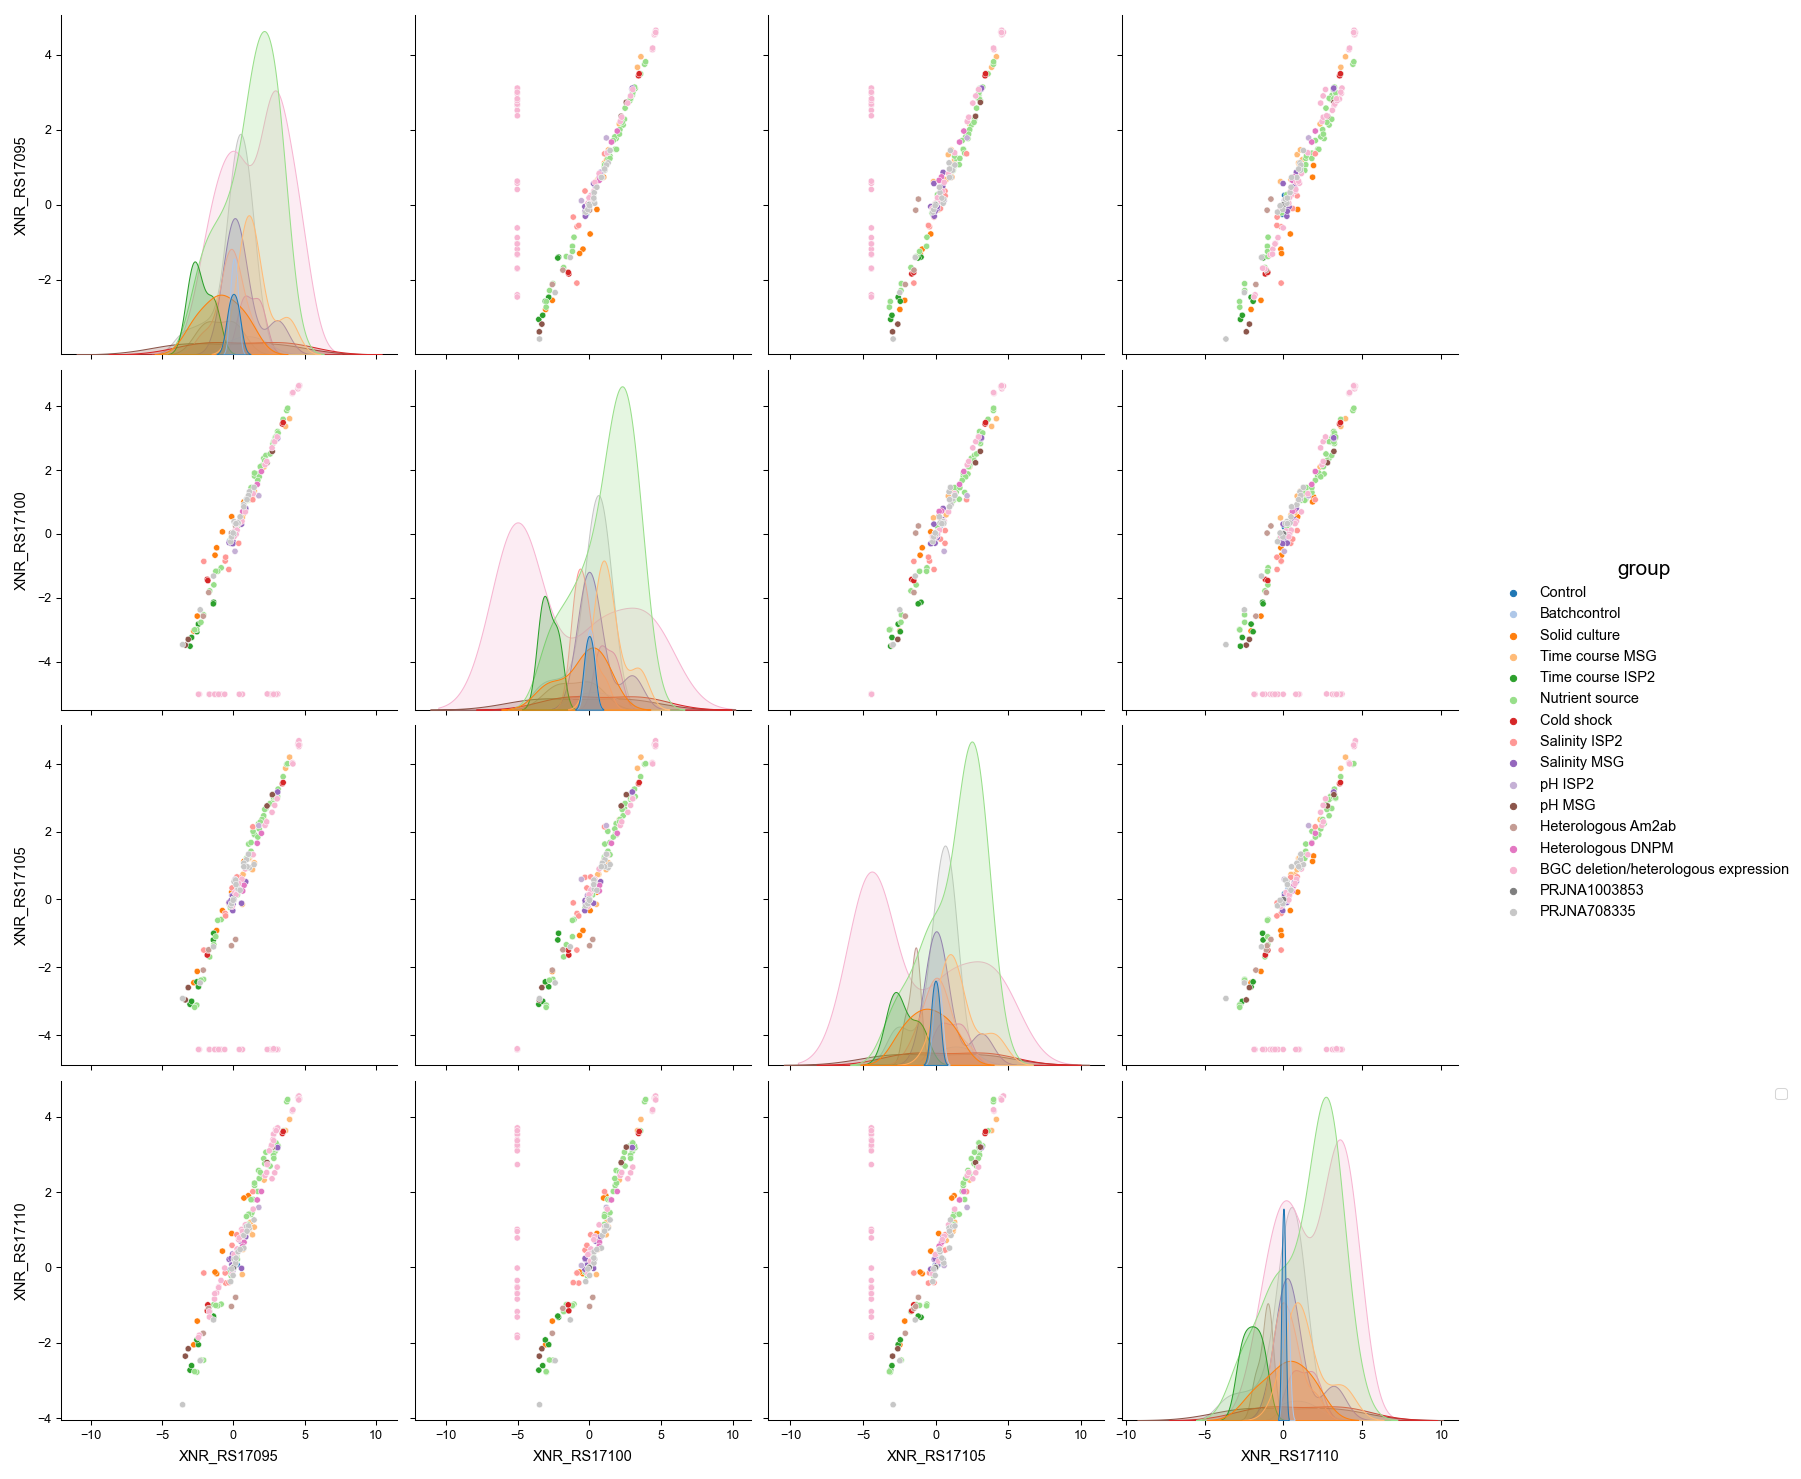

In [14]:
import seaborn as sns

# Convert the page size from mm to inches
width = 85 / 25.4  # ~6.69 inches
height = 80 / 25.4  # ~3.94 inches

# Create a dictionary where the keys are the sample IDs and the values are the project names
groups = ica_data.sample_table['project'].to_dict()

# Generate 16 colors from the 'tab20' colormap
colors = plt.cm.tab20(range(16))

# Transpose the DataFrame and select the rows corresponding to the four genes
genes = ica_data.X.T[['XNR_RS17095', 'XNR_RS17100', 'XNR_RS17105', 'XNR_RS17110']]

# Add a new column to the DataFrame that contains the group information
genes['group'] = pd.Series(groups)

# Create a pairwise plot of the four genes
sns.pairplot(genes, hue='group', palette=colors)

# Increase x and y axis text size
plt.tick_params(axis='both', which='major', labelsize=6)

# Move the legend to the top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(2, 1))

# savefig
plt.savefig("../../reports/figures/modulome/supplementary/surugamide_core_pairplot.svg")

/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/seaborn/_oldcore.py:200: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/Use

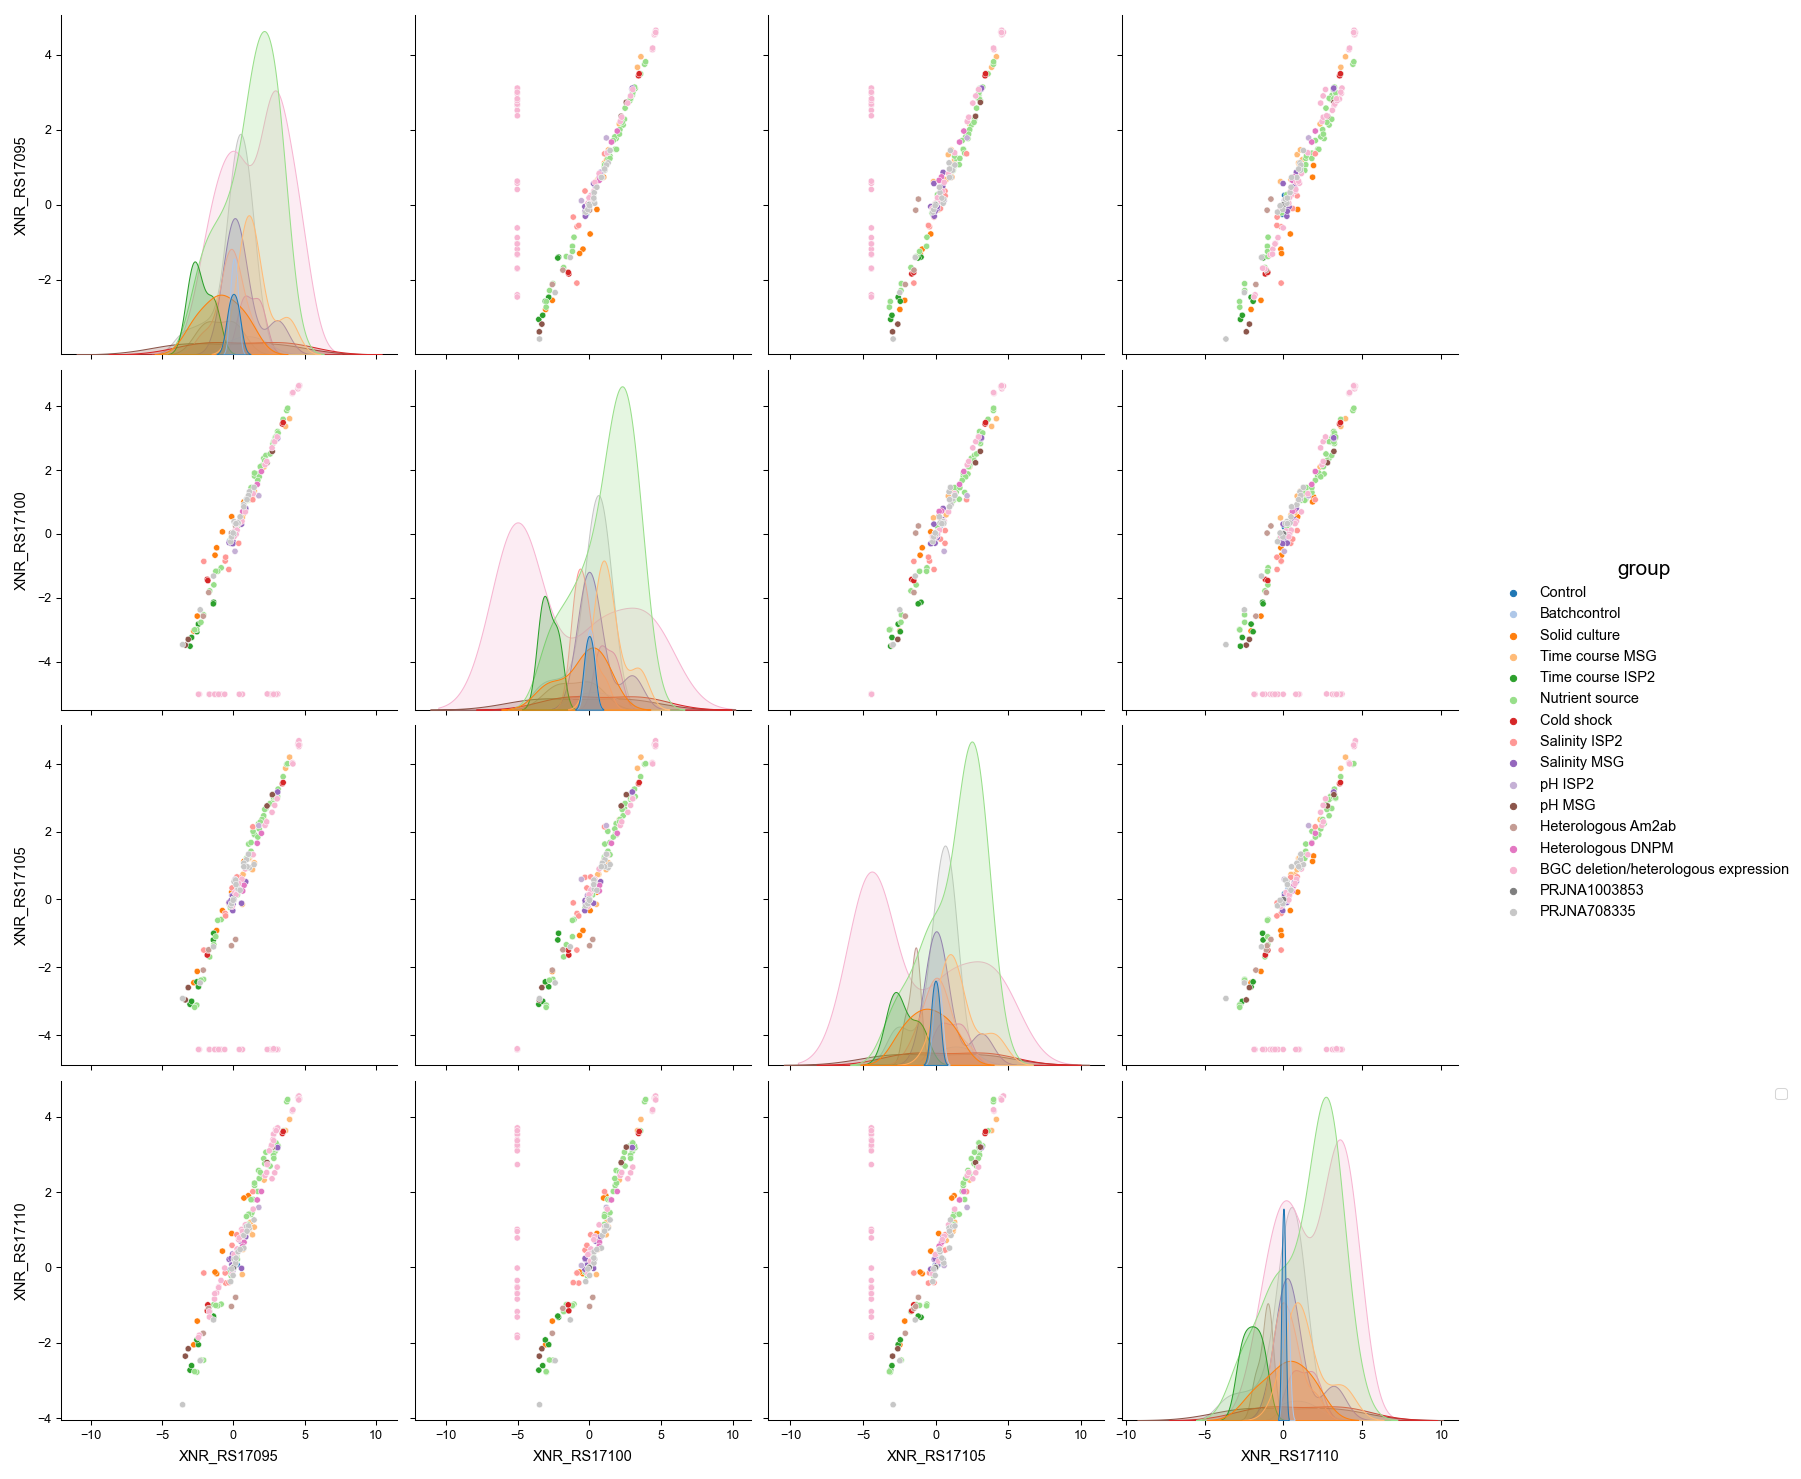